In [15]:
from one.api import ONE
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from brainbox.singlecell import bin_spikes
from iblatlas.atlas import AllenAtlas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.multitest import multipletests
import seaborn as sns

In [2]:
ba = AllenAtlas()
one = ONE()

In [114]:
p_motor_regions = []
sessions_with_regions = one.search_insertions(atlas_acronym= ['MOp'], project='brainwide')
for session in sessions_with_regions:
    p_motor_regions.append(session)

In [115]:
s_motor_regions = []
sessions_with_regions = one.search_insertions(atlas_acronym= ['MOs'], project='brainwide')
for session in sessions_with_regions:
    s_motor_regions.append(session)

In [132]:
sc_regions= []
sessions_with_regions = one.search_insertions(atlas_acronym= ['SCdg'], project='brainwide')
for session in sessions_with_regions:
    sc_regions.append(session)

In [133]:
striatum_regions = []
sessions_with_regions = one.search_insertions(atlas_acronym= ['STR'], project='brainwide')
for session in sessions_with_regions:
    striatum_regions.append(session)

39

In [131]:
sessions_with_regions = one.search_insertions(atlas_acronym= ['STR', 'MO'], project='brainwide')
for session in sessions_with_regions:
    print(session)

In [124]:
pid_matrix = pd.DataFrame(columns = ['Primary Motor Cortex (MOp)', 'Secondary Motor Cortex (MOs)', 
                                     'Superior Collicilus (SC)', 'Striatum (STR)'])
pid_matrix['Primary Motor Cortex (MOp)'] = ['73ff4936-8cd3-4a75-a772-f563e67d249d', 'f475ae14-9415-453e-b800-1480ea1c868d', 
                                            '7b05cccc-44f6-4491-a0ea-e38d6e95513d', 'decc8d40-cf74-4263-ae9d-a0cc68b47e86',
                                           '2564dc27-4eda-4fc3-a151-c13475796ee1', 'df07180e-268e-489c-826e-40cb6f63d3a5',
                                           '2d2cdf86-4a0c-42d8-aed3-5b187f160013', '79628a45-c2e3-4206-97df-4c91edaff90f',
                                           '7bd5627e-b02e-47f1-b476-4bf8eaa726b3', '3bd1f88b-4e0c-43a6-9483-3305e82f2fae']

pid_matrix['Secondary Motor Cortex (MOs)'] = ['298e2a70-9801-45f0-b91c-d6bb9718427e', '99993a2b-588e-4c0c-bfec-e3dfb4f61534',
                                             '450cea3b-9289-4708-9df2-a2518bdc4b59', '2564dc27-4eda-4fc3-a151-c13475796ee1',
                                             'ae2b9f1b-ebe3-4b56-8957-31982186e6ec', '5458cb27-d065-4626-bcd8-1aa775e1115e',
                                             '26af22bb-b295-4a45-8ed3-1700604c0708', '45e7731f-4a43-45d5-9029-c080150bc596',
                                             '898f8971-31e9-4fdb-b66e-2ae6d3a33a5b', 'c1014051-d06b-4f85-9887-e7c42a94baf2']

pid_matrix['Superior Collicilus (SC)'] = ['c893c0a3-5597-49cf-baa1-60efdfdef542', 'b7c57ce1-a75b-410a-94b6-8abee5a92c4f',
                                         'e7080659-8319-48a6-b6fd-2e8ce8eeec49', 'fe41986d-4966-4a77-af7e-e7f71c25aec5',
                                         '00a824c0-e060-495f-9ebc-79c82fef4c67', '7791ee46-5c13-4d1b-8518-5602dcb8666b',
                                         '53ecbf4f-e0d8-4fe6-a852-8b934a37a1c2', '9150758e-1390-41d1-b426-96675e60dbea',
                                         'ca5404f7-297c-40f1-bbf0-5ac0a63e24f8', 'e4ce2e94-6fb9-4afe-acbf-6f5a3498602e']

pid_matrix['Striatum (STR)'] = ['73ff4936-8cd3-4a75-a772-f563e67d249d', 'f475ae14-9415-453e-b800-1480ea1c868d',
                                'c4b5a9fa-10cb-4195-9c17-15b6a1f77f9a', '45c49ba2-a113-4446-9c6d-9b049c1f9f74',
                               'fd555d39-b728-44aa-90d2-796b8bb58300', '45e7731f-4a43-45d5-9029-c080150bc596',
                               '6a22a5b4-79ec-4b3c-b023-1ec7b4a2b675', 'adca9242-0725-41d4-8eb1-5655a464431d',
                               '19c9caea-2df8-4097-92f8-0a2bad055948', 'd3deaed9-34b7-41da-bd62-961750cb9ca0']

In [125]:
pid_matrix

Primary Motor Cortex (MOp)          Secondary Motor Cortex (MOs)  \
0  73ff4936-8cd3-4a75-a772-f563e67d249d  298e2a70-9801-45f0-b91c-d6bb9718427e   
1  f475ae14-9415-453e-b800-1480ea1c868d  99993a2b-588e-4c0c-bfec-e3dfb4f61534   
2  7b05cccc-44f6-4491-a0ea-e38d6e95513d  450cea3b-9289-4708-9df2-a2518bdc4b59   
3  decc8d40-cf74-4263-ae9d-a0cc68b47e86  2564dc27-4eda-4fc3-a151-c13475796ee1   
4  2564dc27-4eda-4fc3-a151-c13475796ee1  ae2b9f1b-ebe3-4b56-8957-31982186e6ec   
5  df07180e-268e-489c-826e-40cb6f63d3a5  5458cb27-d065-4626-bcd8-1aa775e1115e   
6  2d2cdf86-4a0c-42d8-aed3-5b187f160013  26af22bb-b295-4a45-8ed3-1700604c0708   
7  79628a45-c2e3-4206-97df-4c91edaff90f  45e7731f-4a43-45d5-9029-c080150bc596   
8  7bd5627e-b02e-47f1-b476-4bf8eaa726b3  898f8971-31e9-4fdb-b66e-2ae6d3a33a5b   
9  3bd1f88b-4e0c-43a6-9483-3305e82f2fae  c1014051-d06b-4f85-9887-e7c42a94baf2   

               Superior Collicilus (SC)                        Striatum (STR)  
0  c893c0a3-5597-49cf-baa1-60efdfdef542  73ff4936-8cd3-4a75-a772-f563e67d249d  
1  b7c57ce1-a75b-410a-94b6-8abee5a92c4f  f475ae14-9415-453e-b800-1480ea1c868d  
2  e7080659-8319-48a6-b6fd-2e8ce8eeec49  c4b5a9fa-10cb-4195-9c17-15b6a1f77f9a  
3  fe41986d-4966-4a77-af7e-e7f71c25aec5  45c49ba2-a113-4446-9c6d-9b049c1f9f74  
4  00a824c0-e060-495f-9ebc-79c82fef4c67  fd555d39-b728-44aa-90d2-796b8bb58300  
5  7791ee46-5c13-4d1b-8518-5602dcb8666b  45e7731f-4a43-45d5-9029-c080150bc596  
6  53ecbf4f-e0d8-4fe6-a852-8b934a37a1c2  6a22a5b4-79ec-4b3c-b023-1ec7b4a2b675  
7  9150758e-1390-41d1-b426-96675e60dbea  adca9242-0725-41d4-8eb1-5655a464431d  
8  ca5404f7-297c-40f1-bbf0-5ac0a63e24f8  19c9caea-2df8-4097-92f8-0a2bad055948  
9  e4ce2e94-6fb9-4afe-acbf-6f5a3498602e  d3deaed9-34b7-41da-bd62-961750cb9ca0

In [126]:
pid = pid_matrix['Primary Motor Cortex (MOp)'][0]
eid, _ = one.pid2eid(pid)
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()
ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

C:\Users\elsha\anaconda3\envs\ibl\Lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
C:\Users\elsha\anaconda3\envs\ibl\Lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


Handpick sessions from different brain regions (Superior Colliculus, Primary/Secondary motor, Striatum).
Create loop that goes through each cluster in both probes
Use cluster to align event across trials and create PSTH 
Find clusters and sessions that match the PSTHs that show sensitive clusters (depending on different events[stim onset, movement onset, reward])

In [6]:
bin_size = 0.1
pre_time = 2
post_time = 3
stimulus_events = np.array(sl.trials['stimOn_times'])
movement_events = np.array(sl.trials['firstMovement_times'])
reward_events = np.array(sl.trials['feedback_times'])

In [7]:
session_region_acronym = clusters['acronym'].astype(str)
cluster_ids = np.where(clusters['label'] == 1 & np.char.startswith(session_region_acronym, 'MOp'))[0]
cluster_ids

array([ 11,  69, 147, 163, 172, 177, 178, 196, 206, 257])

In [8]:
sl.trials

stimOff_times  goCueTrigger_times  feedbackType  contrastLeft  \
0              NaN          111.623602           1.0        1.0000   
1       115.797472          114.398219           1.0           NaN   
2       118.514379          117.190416           1.0        0.2500   
3       121.589942          119.956947           1.0           NaN   
4       125.489958          123.031493          -1.0        0.0000   
..             ...                 ...           ...           ...   
667            NaN         3121.426971           1.0        0.0625   
668            NaN         3127.584630           1.0        0.2500   
669            NaN         3132.226498           1.0        0.1250   
670            NaN         3136.283671           1.0        1.0000   
671            NaN         3142.193031           1.0        0.1250   

     contrastRight  rewardVolume  goCue_times  choice  feedback_times  \
0              NaN           1.5          NaN     1.0             NaN   
1            0.125           1.5   114.398939    -1.0      114.721404   
2              NaN           1.5   117.191205     1.0      117.441190   
3            1.000           1.5   119.957936    -1.0      120.523282   
4              NaN           0.0   123.032252    -1.0      123.423166   
..             ...           ...          ...     ...             ...   
667            NaN           1.5          NaN     1.0             NaN   
668            NaN           1.5          NaN     1.0             NaN   
669            NaN           1.5          NaN     1.0             NaN   
670            NaN           1.5          NaN     1.0             NaN   
671            NaN           1.5          NaN     1.0             NaN   

     stimOn_times  response_times  firstMovement_times  probabilityLeft  \
0             NaN      111.921005                  NaN              0.5   
1      114.398075      114.721318           114.485784              0.5   
2      117.190245      117.441119           117.349784              0.5   
3      119.956784      120.523155           120.108784              0.5   
4      123.031292      123.422297           123.194784              0.5   
..            ...             ...                  ...              ...   
667           NaN     3124.197552                  NaN              0.8   
668           NaN     3127.877028                  NaN              0.8   
669           NaN     3132.487497                  NaN              0.8   
670           NaN     3136.625869                  NaN              0.8   
671           NaN     3142.442730                  NaN              0.8   

     intervals_0  intervals_1  
0     111.121198   113.490319  
1     113.919321   116.297516  
2     116.682211   119.014437  
3     119.403438   122.090083  
4     122.484186   125.990031  
..           ...          ...  
667  3120.611276  3125.743344  
668  3126.856534  3129.434120  
669  3130.527310  3134.059889  
670  3135.149479  3138.199960  
671  3139.321551  3144.017422  

[672 rows x 15 columns]

cluster #11


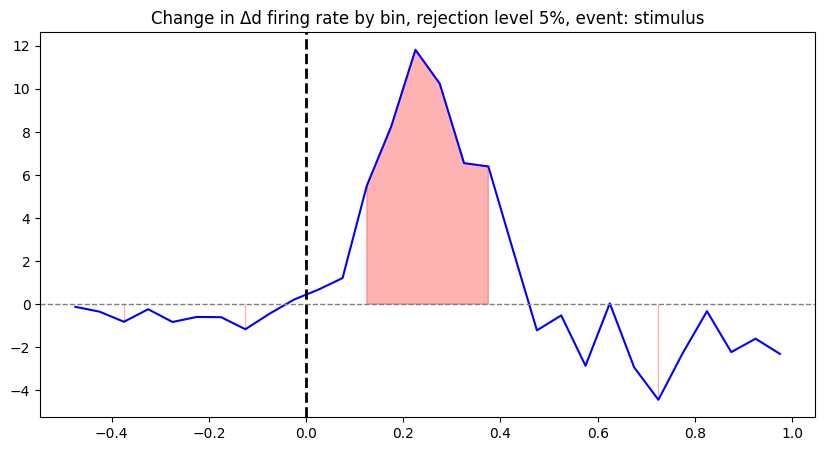

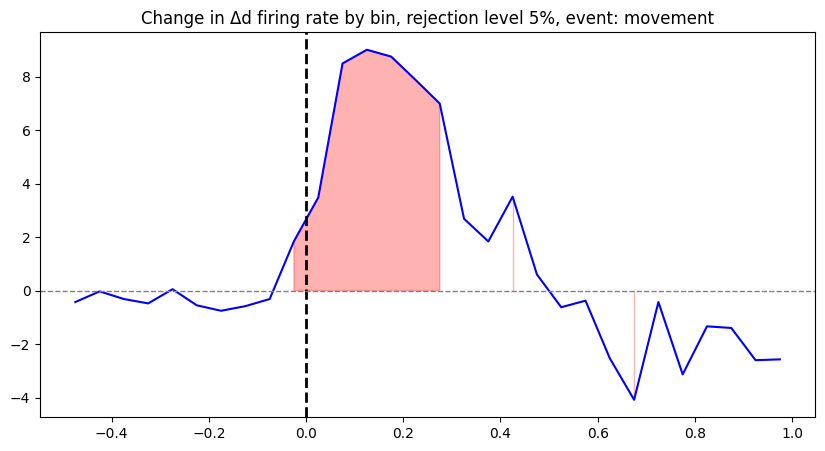

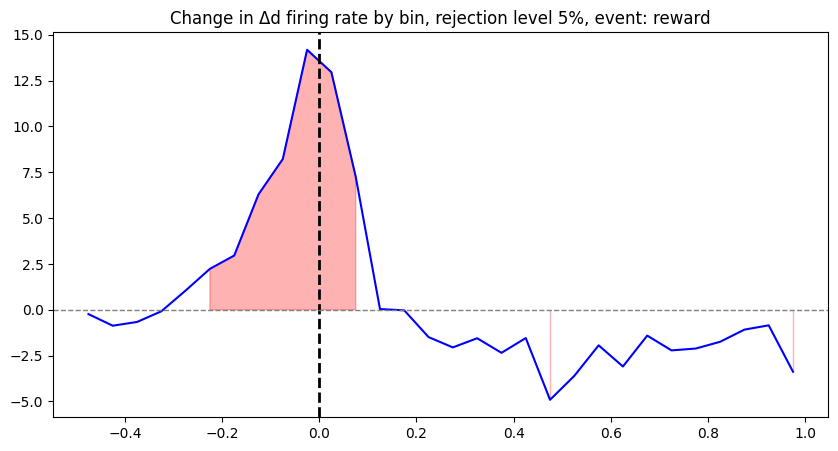

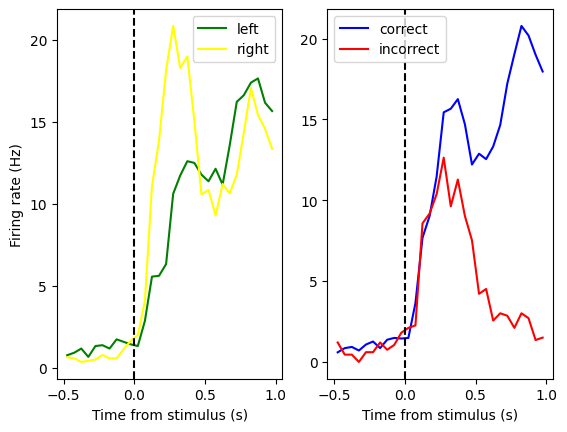

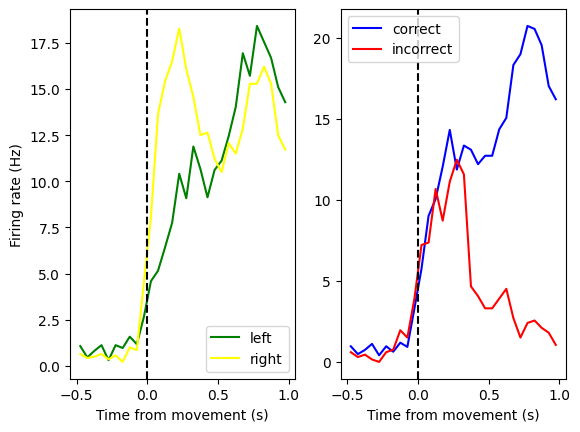

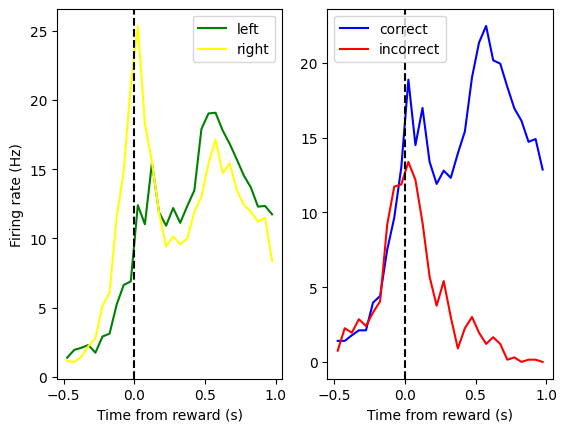

cluster #69


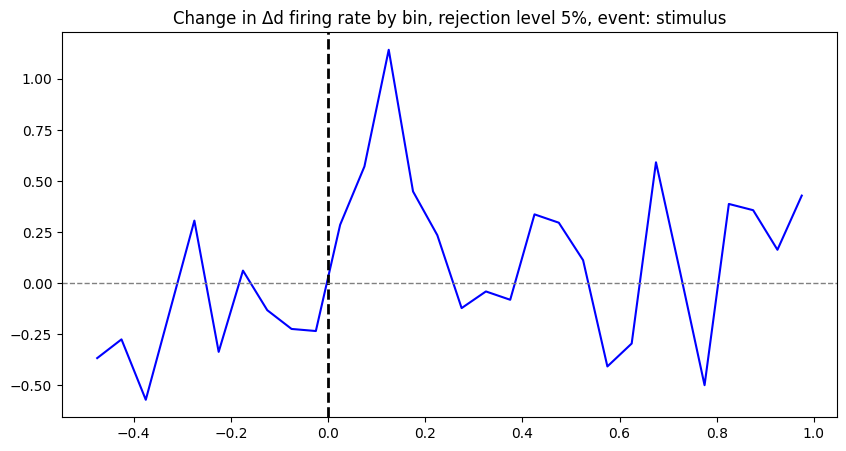

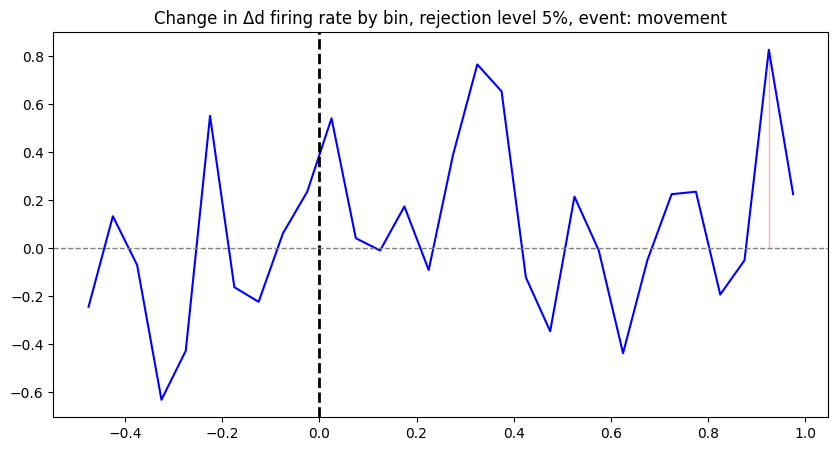

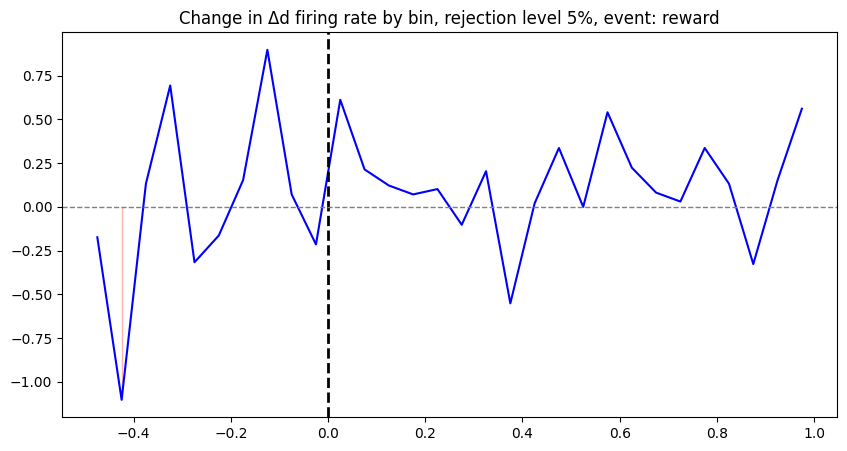

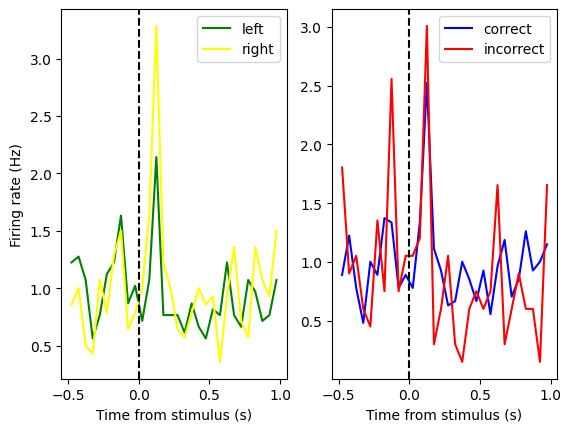

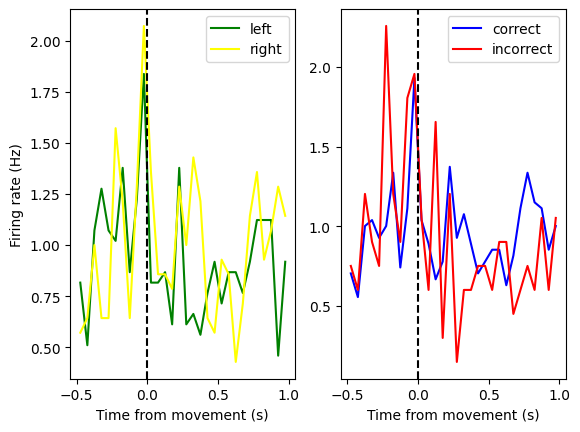

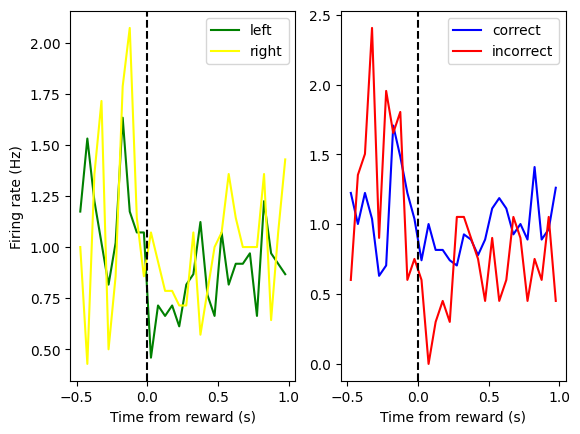

cluster #147


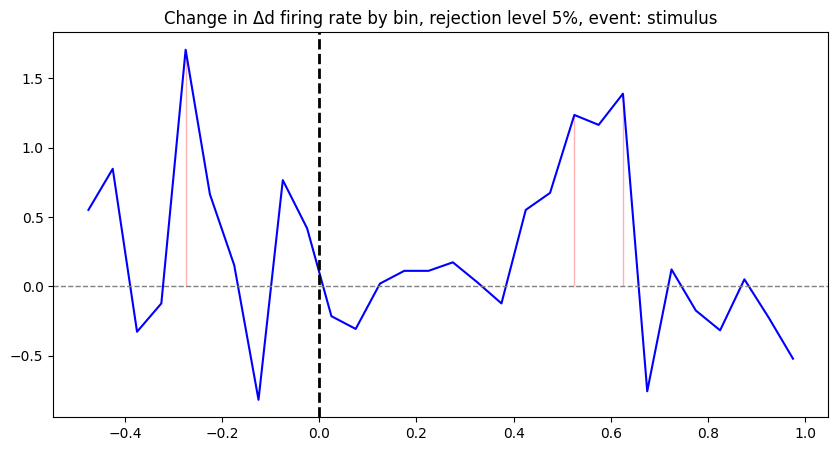

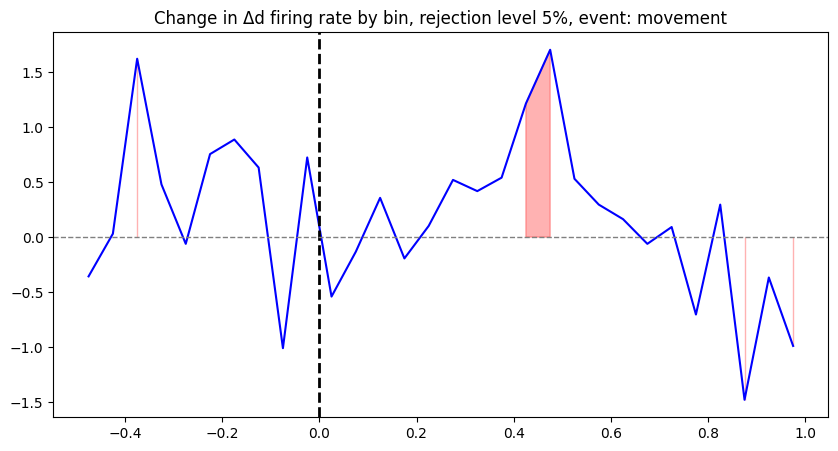

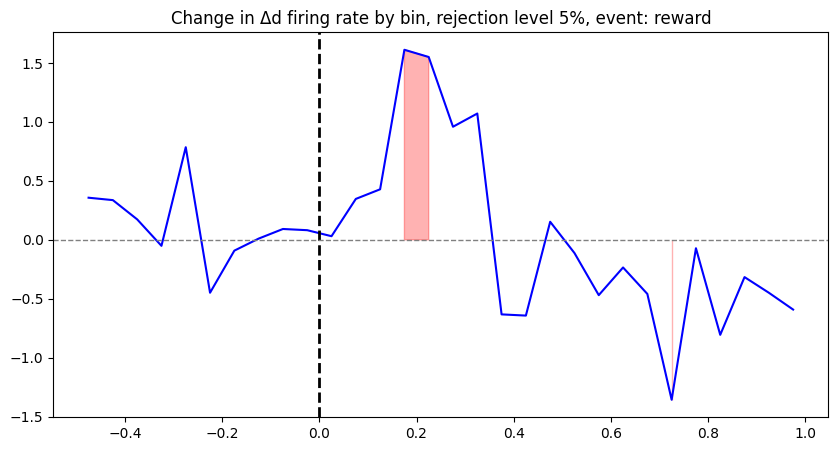

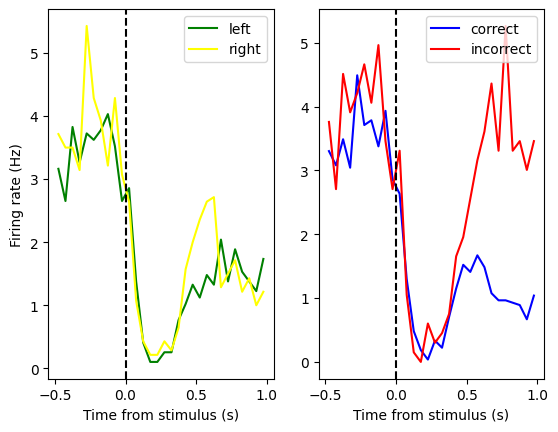

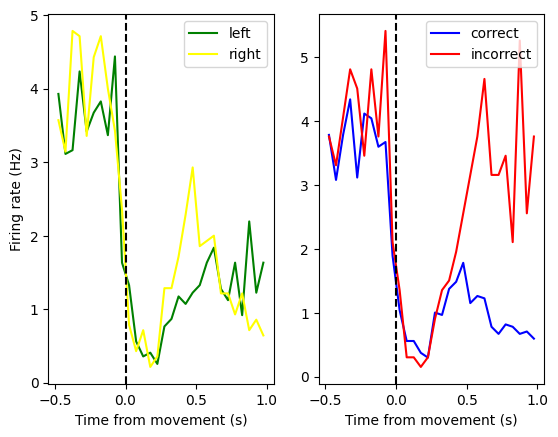

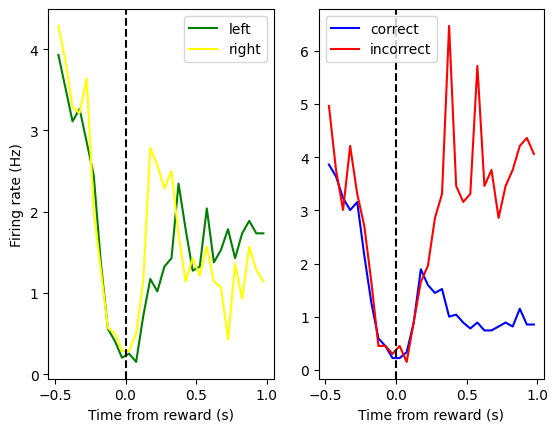

cluster #163


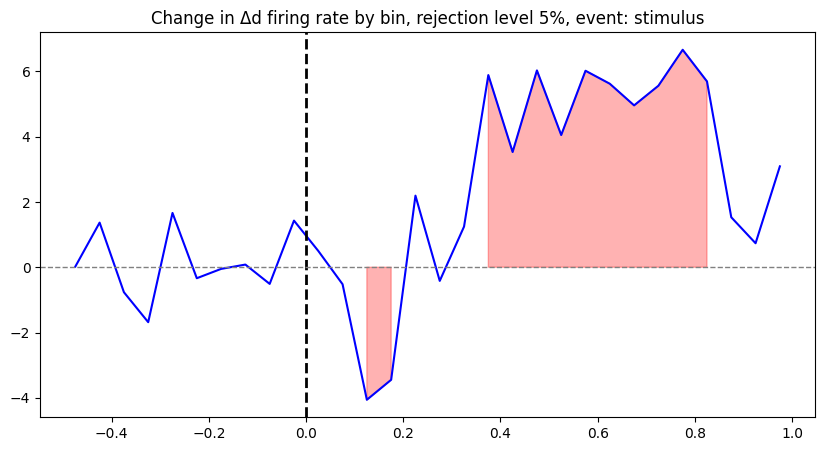

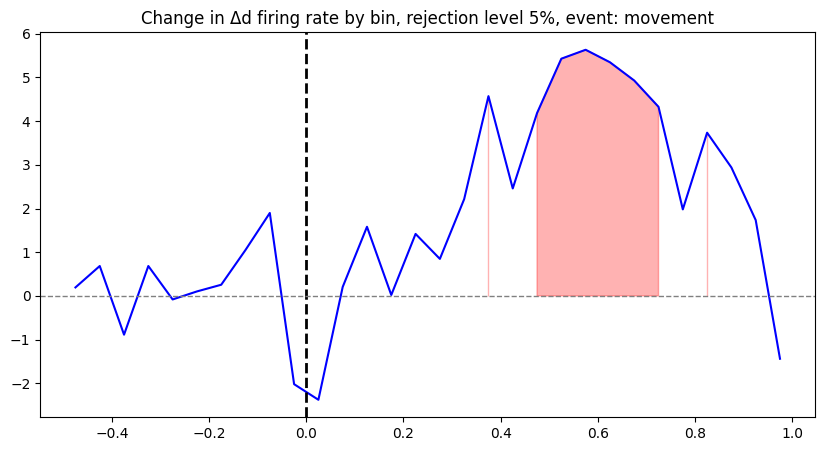

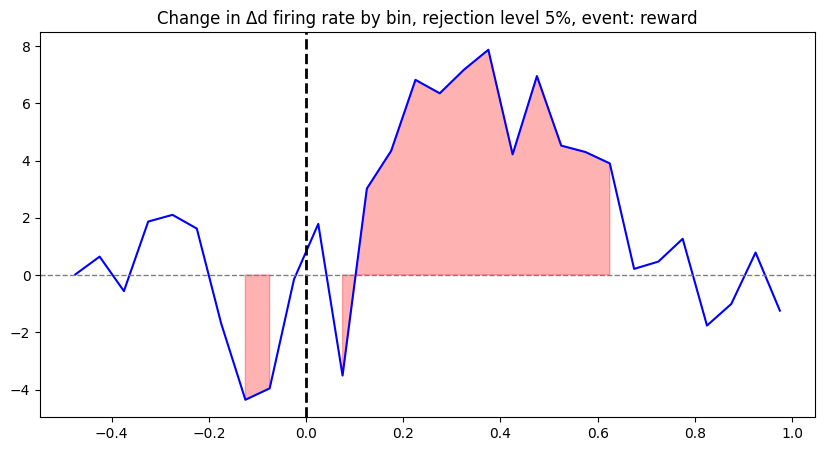

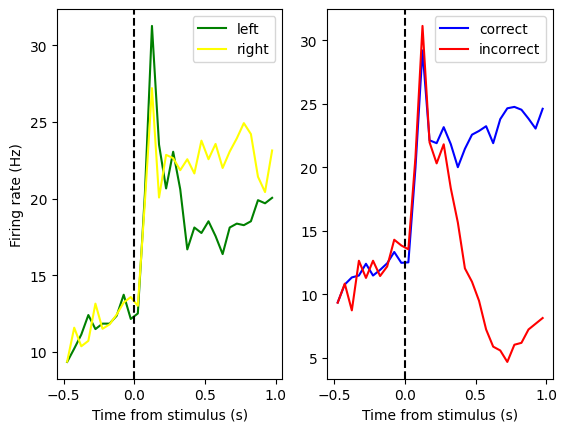

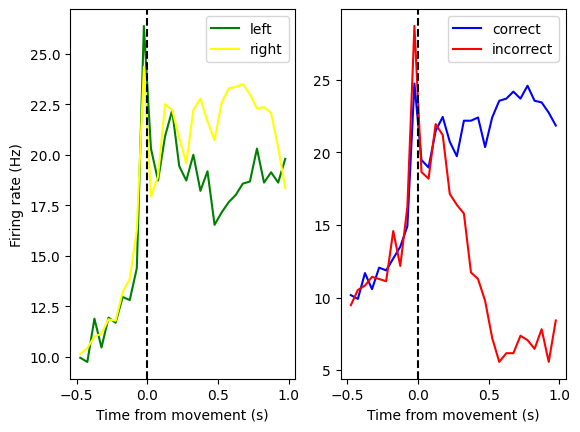

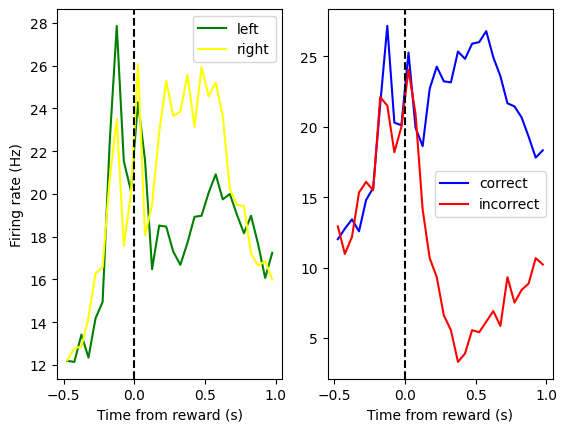

cluster #172


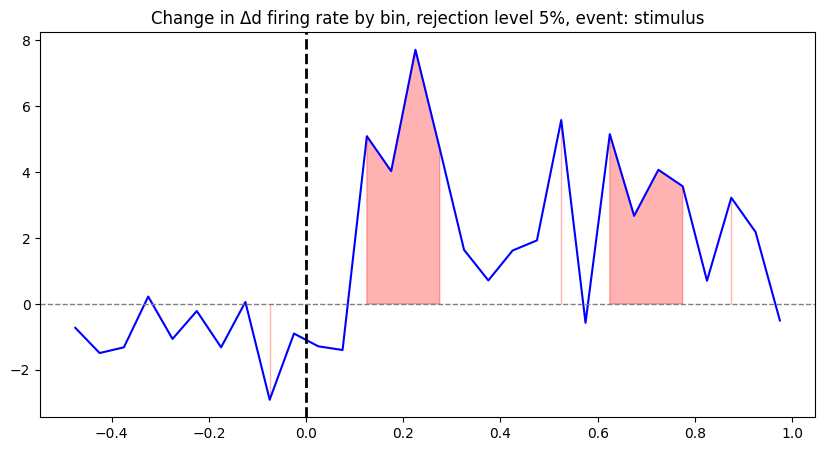

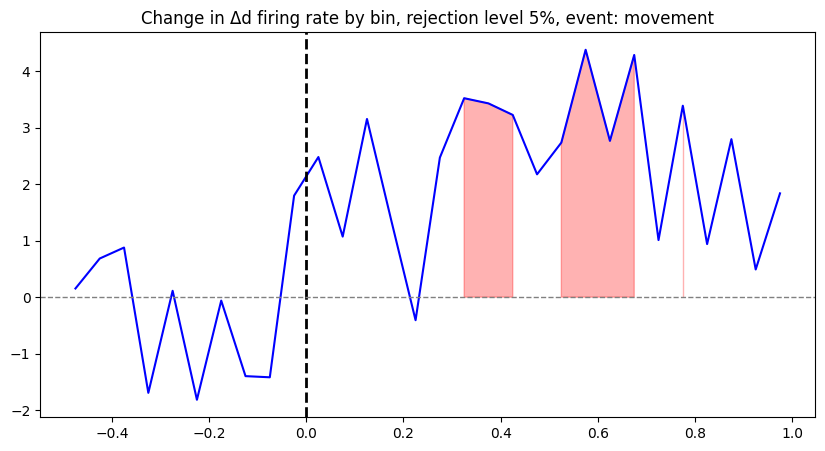

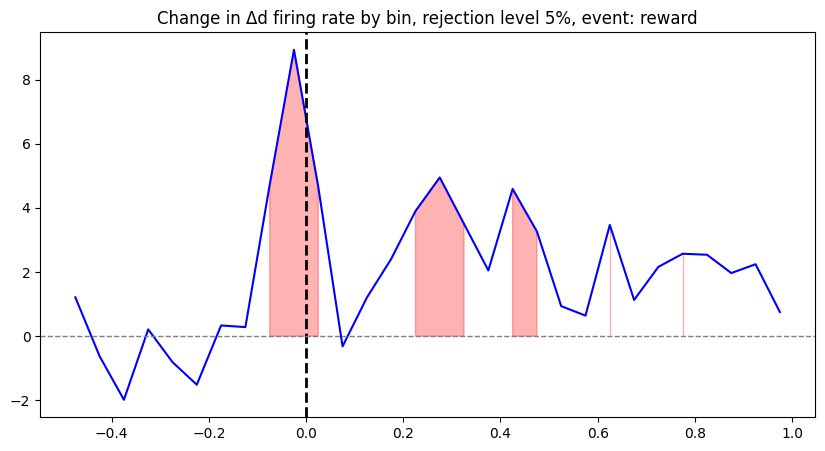

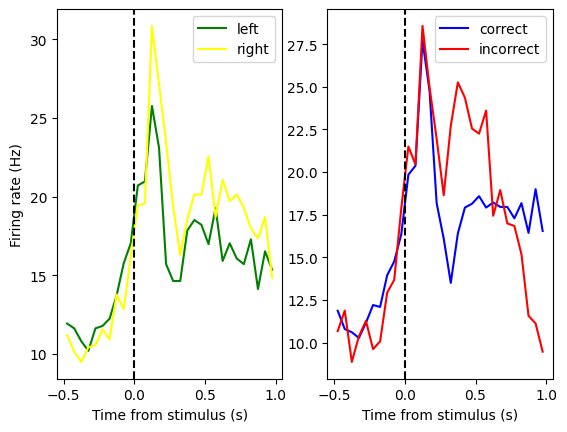

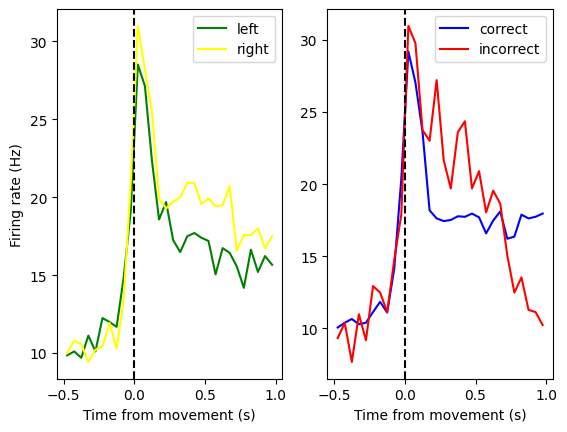

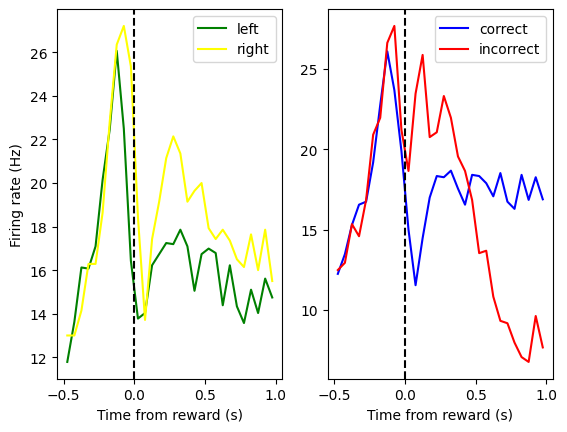

cluster #177


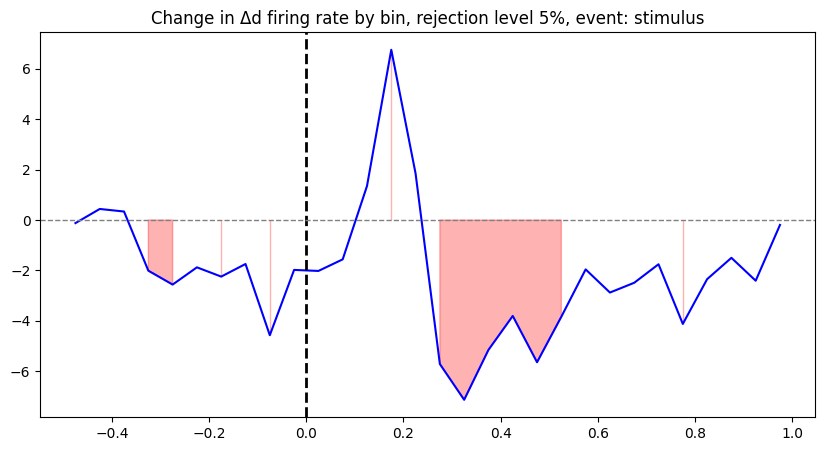

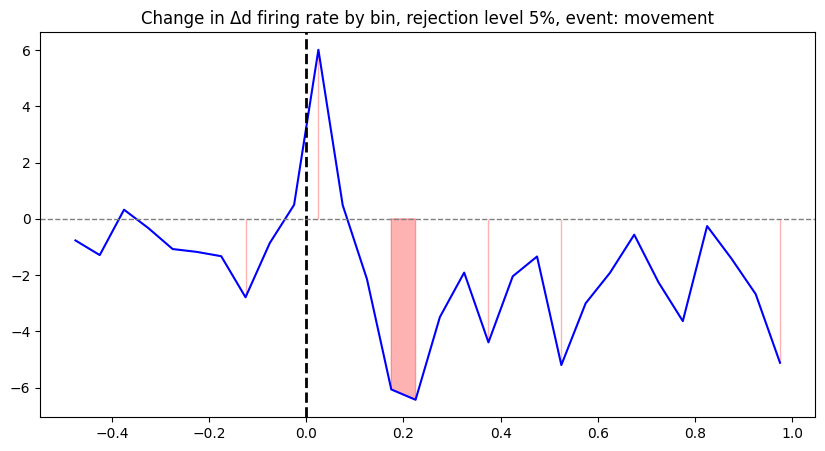

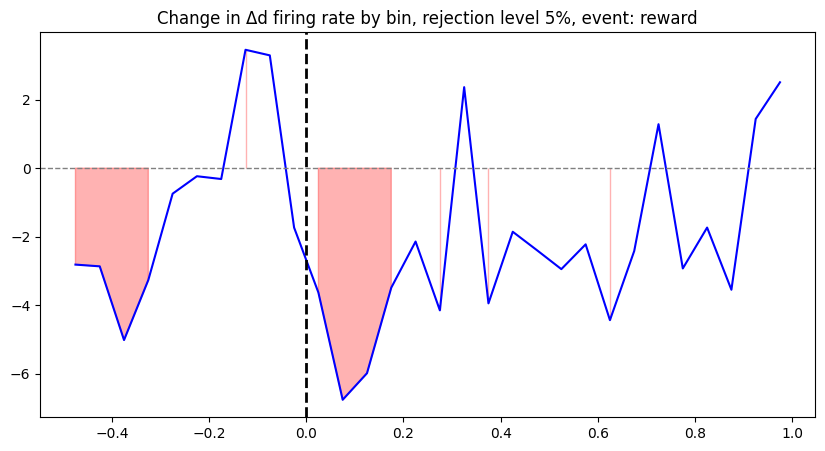

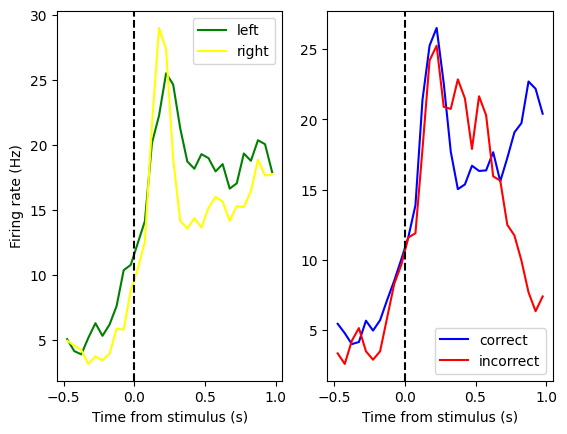

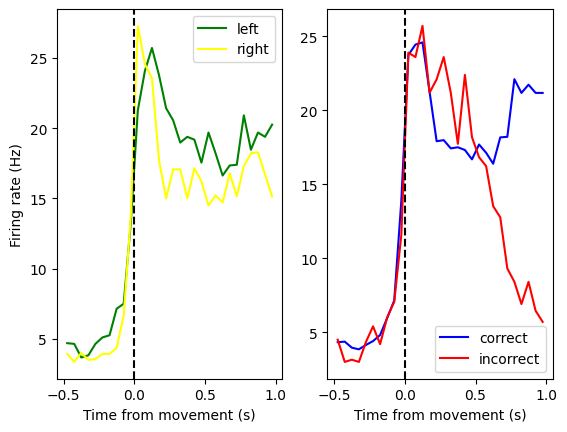

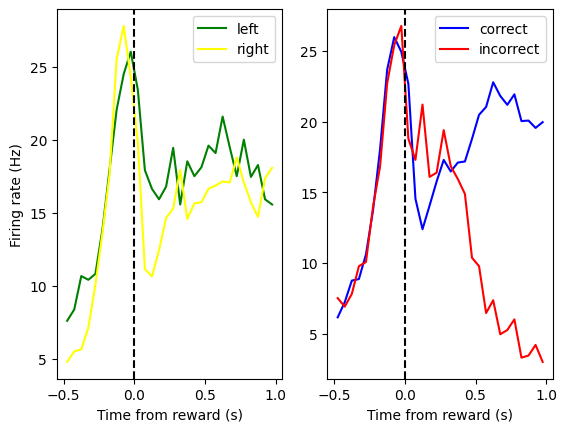

cluster #178


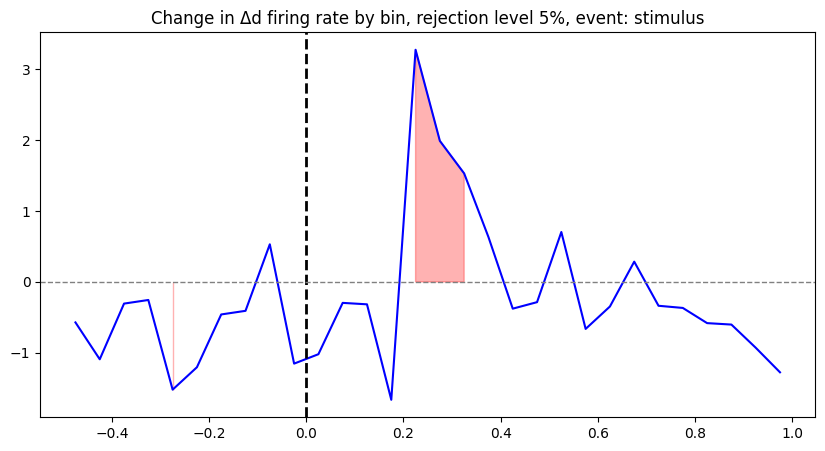

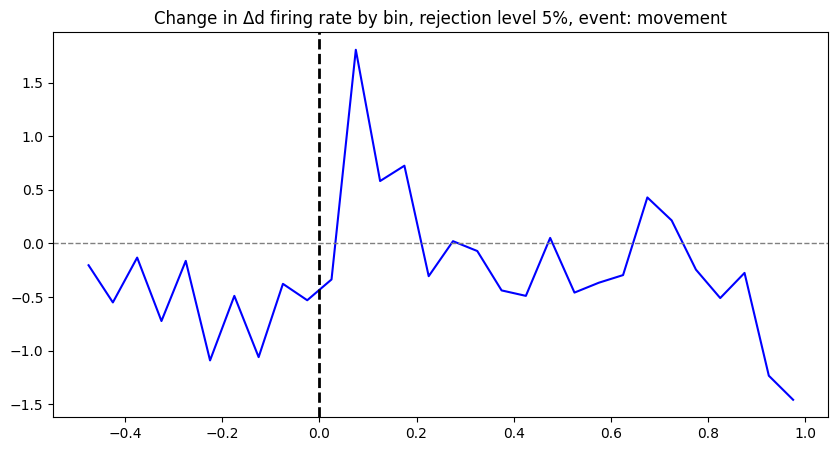

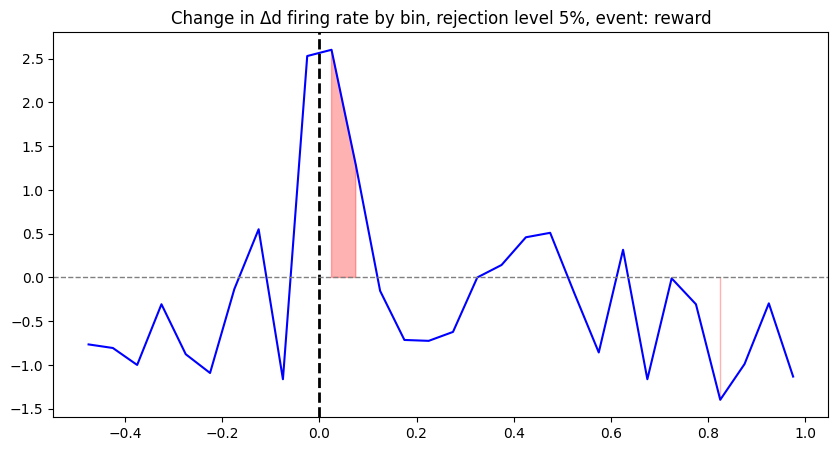

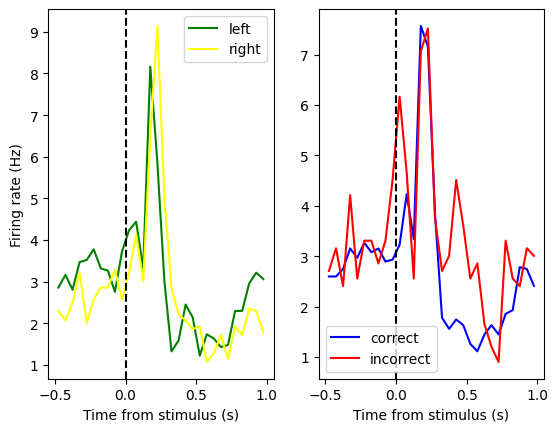

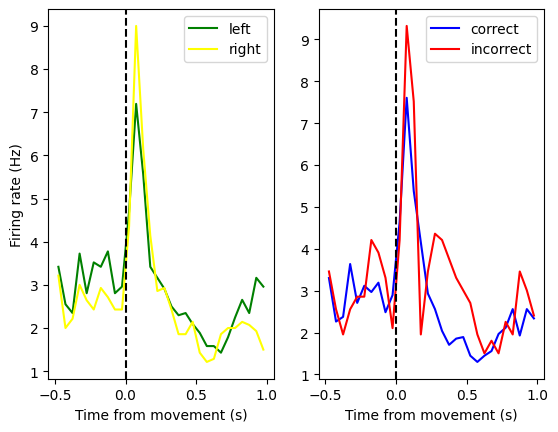

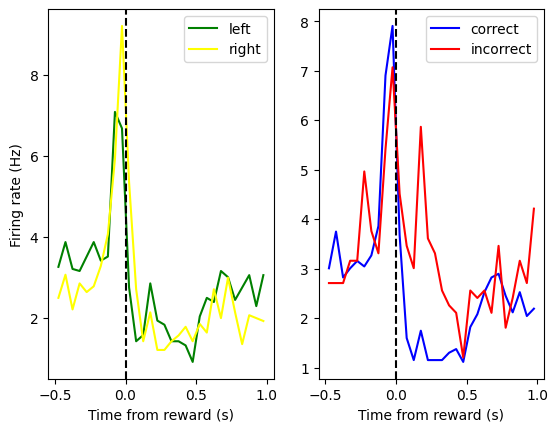

cluster #196


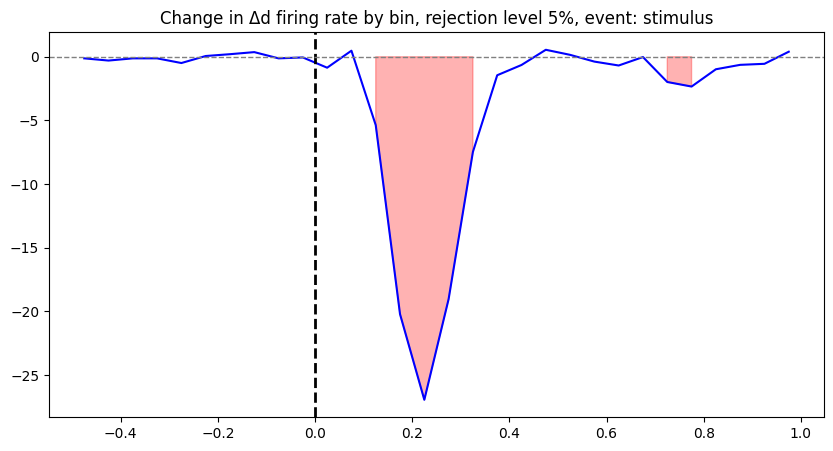

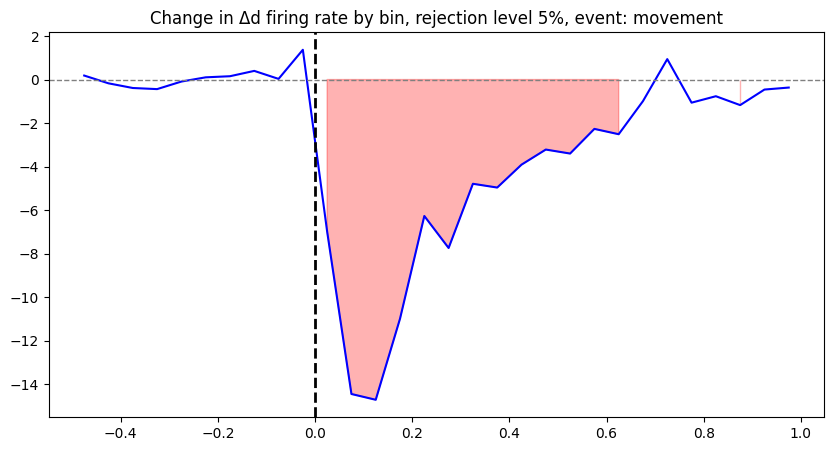

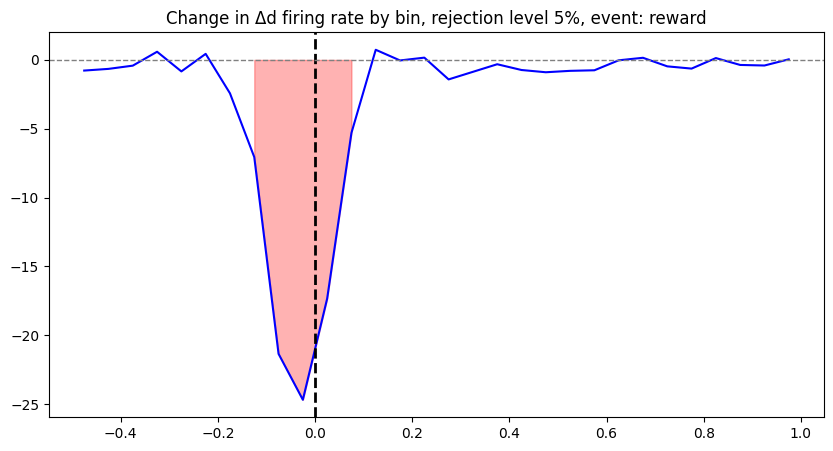

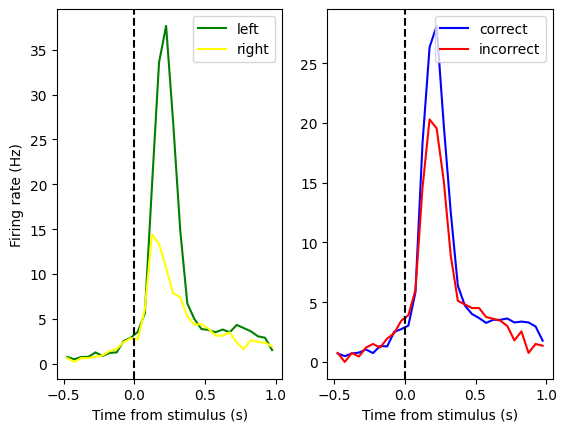

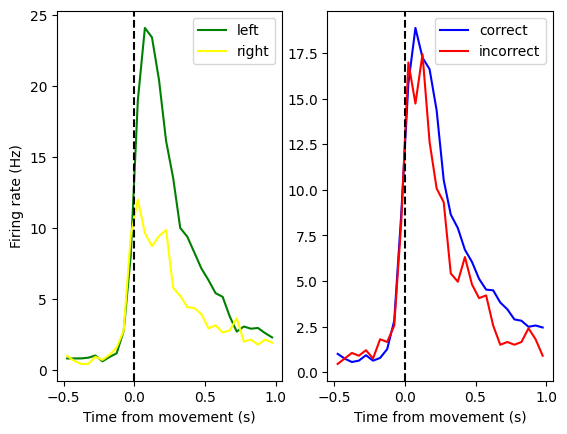

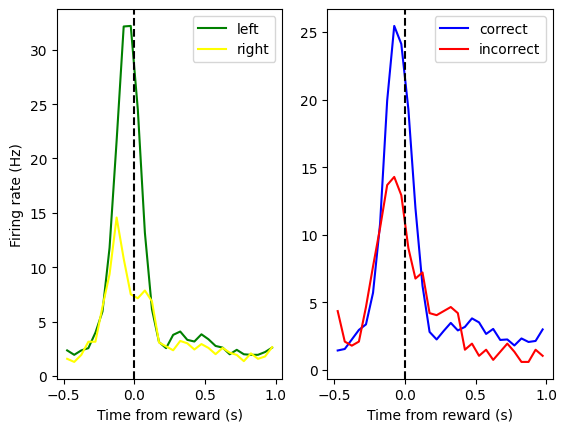

cluster #206


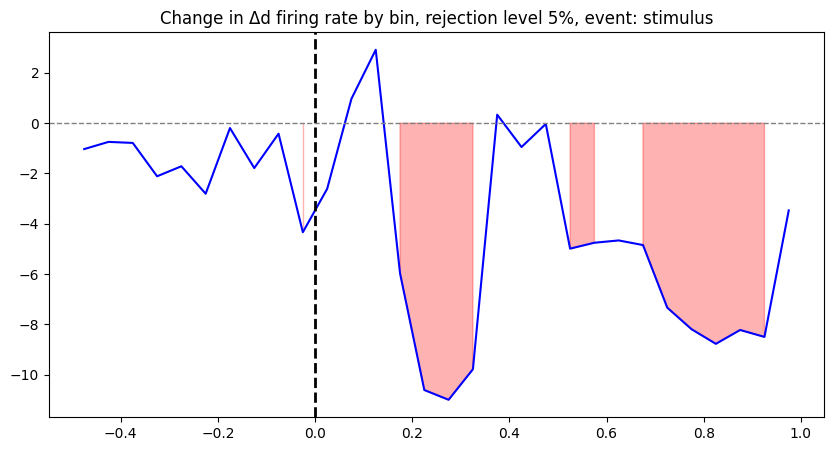

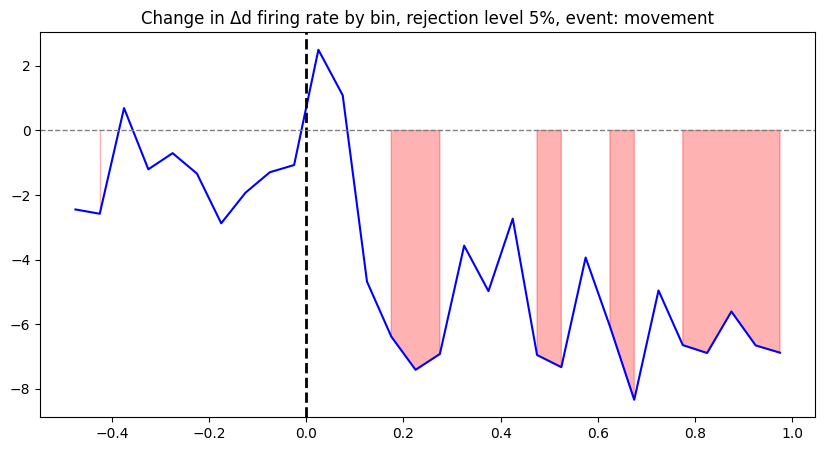

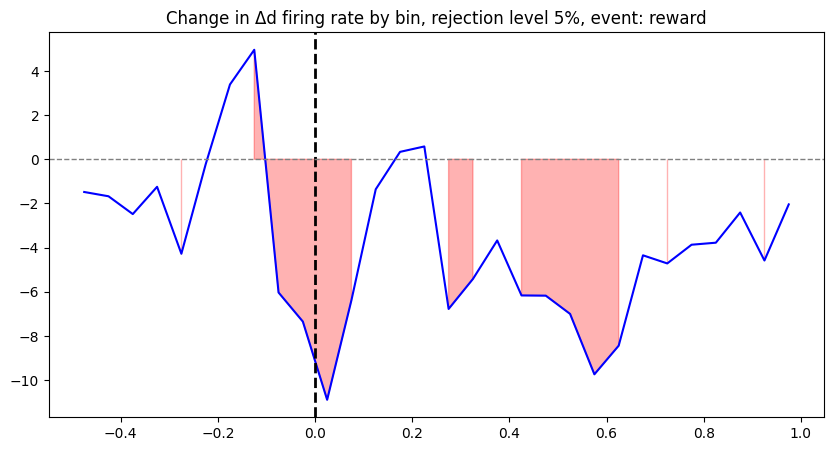

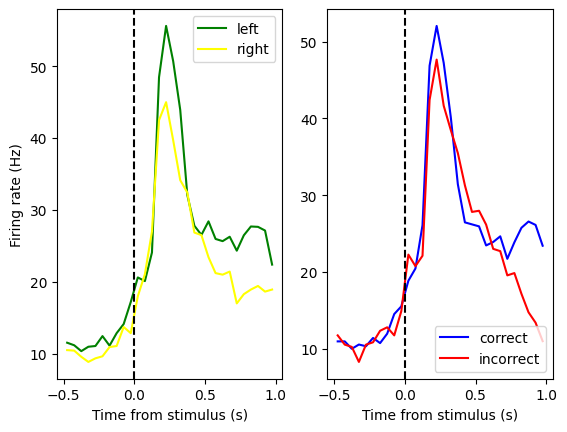

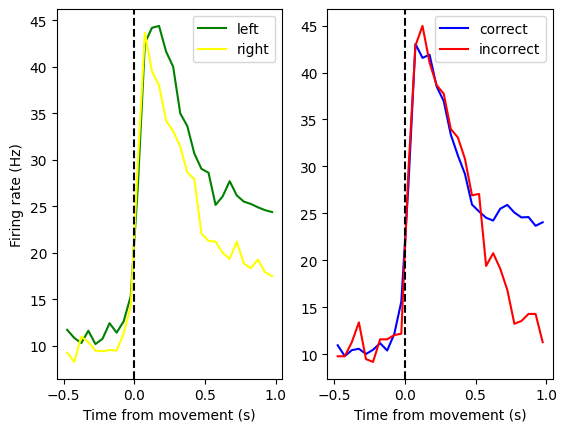

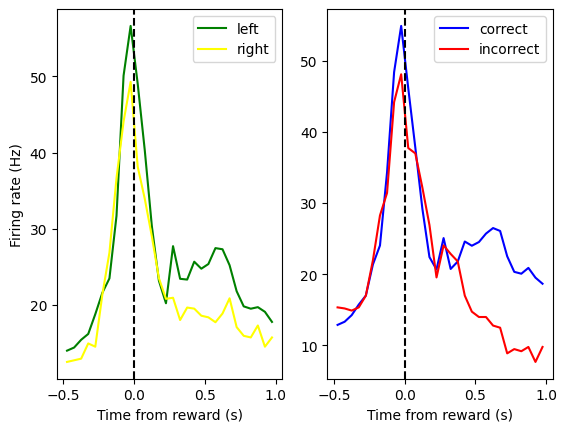

cluster #257


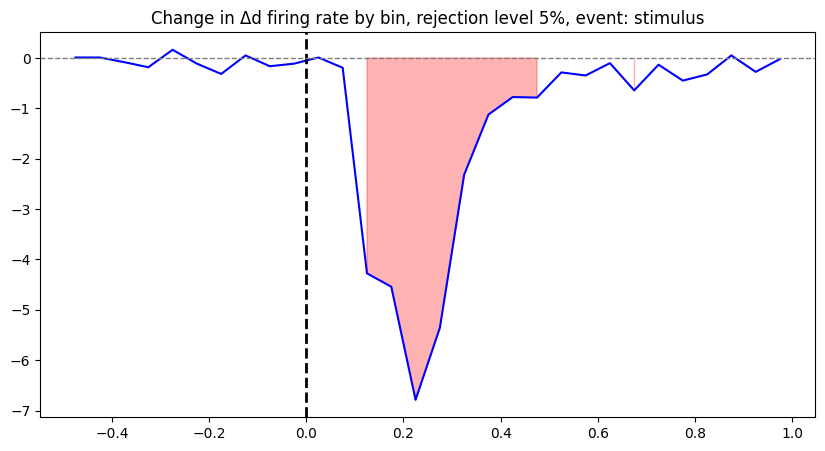

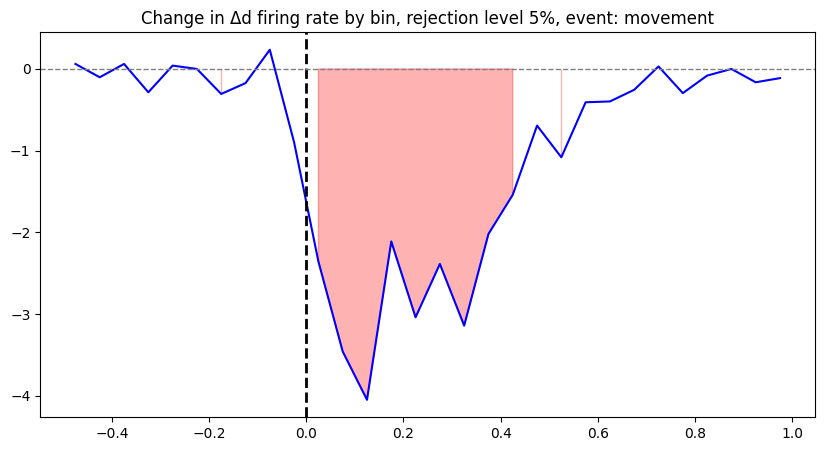

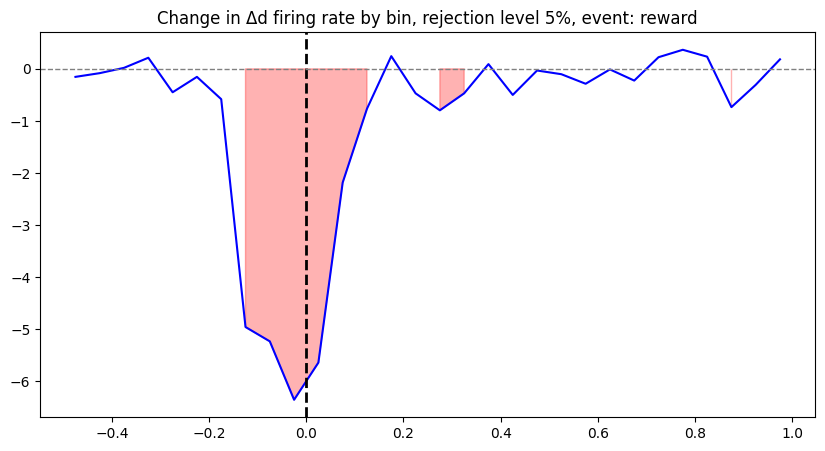

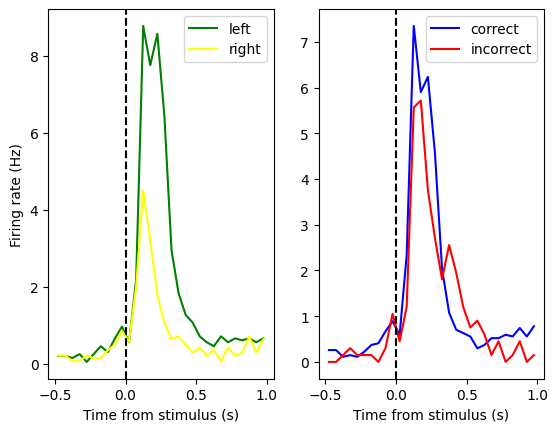

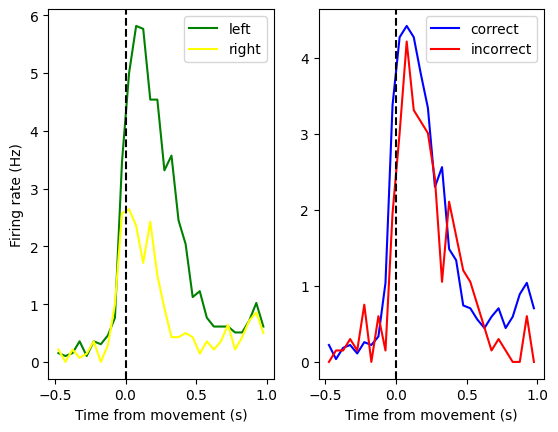

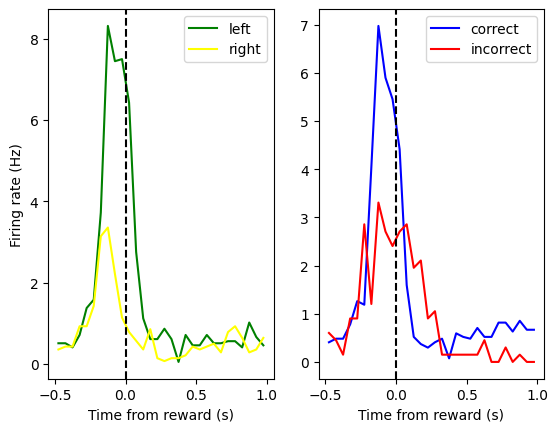

In [34]:
significant_stim_clusters = []
significant_movement_clusters = []
significant_reward_clusters = []
for cluster in cluster_ids:
    spikes_idx = (spikes['clusters'] == cluster)
    spike_times = spikes.times[spikes_idx]
    
    stim_spike_raster, stim_times = bin_spikes(spike_times, stimulus_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    stim_spike_raster = stim_spike_raster / bin_size

    move_spike_raster, move_times = bin_spikes(spike_times, movement_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    move_spike_raster = move_spike_raster / bin_size

    reward_spike_raster, reward_times = bin_spikes(spike_times, reward_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    reward_spike_raster = reward_spike_raster / bin_size

    print(f"cluster #{cluster}")
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on stimulus 
    left_idx = ~np.isnan(sl.trials['contrastLeft'])
    right_idx = ~np.isnan(sl.trials['contrastRight'])
    psth_left = np.nanmean(stim_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(stim_spike_raster[right_idx], axis=0)
    
    correct_idx = sl.trials['feedbackType'] == 1
    incorrect_idx = sl.trials['feedbackType'] == -1
    
    psth_correct = np.nanmean(stim_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(stim_spike_raster[incorrect_idx], axis=0)

    

#------permutation testing for stimOn event--------------------------------------------------------------------------------------------------------------
    n_shuffles = 1000  # Number of permutations
    
    # Initialize matrices for delta and shuffled deltas
    stim_d = np.zeros((stim_spike_raster.shape[1]))  # Observed delta
    stim_shuffled_d = np.zeros((n_shuffles, stim_spike_raster.shape[1]))  # Null distribution
    
    # Compute observed delta (difference in mean firing rates per bin)
    for i in range(stim_spike_raster.shape[1]):  # Loop over time bins
        stim_d[i] = np.nanmean(stim_spike_raster[right_idx, i]) - np.nanmean(stim_spike_raster[left_idx, i])

    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx) 
        shuffled_right = np.random.permutation(right_idx)# Shuffle trial labels
        for i in range(stim_spike_raster.shape[1]):
            stim_shuffled_d[shuff, i] = np.nanmean(stim_spike_raster[shuffled_right, i]) - np.nanmean(stim_spike_raster[shuffled_left, i])
    stim_p_values = np.mean(np.abs(stim_shuffled_d) >= np.abs(stim_d), axis=0)

    alpha = 0.01  # Desired false discovery rate
    stim_reject, stim_p_fdr_corrected, _, _ = multipletests(stim_p_values, alpha=alpha, method='fdr_bh')
    
    significant_stim_times = np.where(stim_reject)[0]  # Time bins with significant differences
    if (np.count_nonzero(stim_reject) > 3):
        significant_stim_clusters.append(cluster)
    
    # Find the index where the event occurs (should be time zero in aligned bins)
    event_time_idx = np.argmin(np.abs(stim_times))  # Find closest bin to time zero
    
    plt.figure(figsize=(10, 5))
    plt.plot(stim_times, stim_d, label="Observed Δ Firing Rate", color='blue')  # X-axis should be real time
    plt.title("Change in Δd firing rate by bin, rejection level 5%, event: stimulus")
    # Draw a vertical line at event onset (aligned to zero time)
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    
    # Draw horizontal baseline
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  
    
    # Highlight significant time bins only
    plt.fill_between(stim_times, stim_d, where=stim_reject, color='red', alpha=0.3, label="Significant (FDR < 0.05)")


 ##-------permutation testing for firstMove event------------------------------------------------------------------------------------------------------
    
    # Initialize matrices for delta and shuffled deltas
    movement_d = np.zeros((move_spike_raster.shape[1]))  # Observed delta
    shuffled_movement_d = np.zeros((n_shuffles, move_spike_raster.shape[1]))  # Null distribution
    
    # Compute observed delta (difference in mean firing rates per bin)
    for i in range(move_spike_raster.shape[1]):  # Loop over time bins
        movement_d[i] = np.nanmean(move_spike_raster[right_idx, i]) - np.nanmean(move_spike_raster[left_idx, i])

    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx) 
        shuffled_right = np.random.permutation(right_idx)# Shuffle trial labels
        for i in range(stim_spike_raster.shape[1]):
            shuffled_movement_d[shuff, i] = np.nanmean(move_spike_raster[shuffled_right, i]) - np.nanmean(move_spike_raster[shuffled_left, i])
    movement_p_values = np.mean(np.abs(shuffled_movement_d) >= np.abs(movement_d), axis=0)

    alpha = 0.01  # Desired false discovery rate
    movement_reject, movement_p_fdr_corrected, _, _ = multipletests(movement_p_values, alpha=alpha, method='fdr_bh')
    
    significant_movement_times = np.where(movement_reject)[0]  # Time bins with significant differences
    if np.count_nonzero(movement_reject) > 3:
        significant_movement_clusters.append(cluster)
        
    # Find the index where the event occurs (should be time zero in aligned bins)
    event_time_idx = np.argmin(np.abs(move_times))  # Find closest bin to time zero
    
    plt.figure(figsize=(10, 5))
    plt.plot(move_times, movement_d, label="Observed Δ Firing Rate", color='blue')  # X-axis should be real time
    plt.title("Change in Δd firing rate by bin, rejection level 5%, event: movement")
    # Draw a vertical line at event onset (aligned to zero time)
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    
    # Draw horizontal baseline
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  
    
    # Highlight significant time bins only
    plt.fill_between(move_times, movement_d, where=movement_reject, color='red', alpha=0.3, label="Significant (FDR < 0.05)")
    
##-----------permutation testing for reward event------------------------------------------------------------------------------------------------------
    
    # Initialize matrices for delta and shuffled deltas
    reward_d = np.zeros((reward_spike_raster.shape[1]))  # Observed delta
    shuffled_reward_d = np.zeros((n_shuffles, reward_spike_raster.shape[1]))  # Null distribution
    
    # Compute observed delta (difference in mean firing rates per bin)
    for i in range(reward_spike_raster.shape[1]):  # Loop over time bins
        reward_d[i] = np.nanmean(reward_spike_raster[right_idx, i]) - np.nanmean(reward_spike_raster[left_idx, i])

    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx) 
        shuffled_right = np.random.permutation(right_idx)# Shuffle trial labels
        for i in range(reward_spike_raster.shape[1]):
            shuffled_reward_d[shuff, i] = np.nanmean(reward_spike_raster[shuffled_right, i]) - np.nanmean(reward_spike_raster[shuffled_left, i])
    reward_p_values = np.mean(np.abs(shuffled_reward_d) >= np.abs(reward_d), axis=0)

    alpha = 0.01  # Desired false discovery rate
    reward_reject, reward_p_fdr_corrected, _, _ = multipletests(reward_p_values, alpha=alpha, method='fdr_bh')
    
    significant_reward_times = np.where(reward_reject)[0]  # Time bins with significant differences
    if np.count_nonzero(reward_reject) > 3:
        significant_reward_clusters.append(cluster)
    # Find the index where the event occurs (should be time zero in aligned bins)
    event_time_idx = np.argmin(np.abs(reward_times))  # Find closest bin to time zero
    
    plt.figure(figsize=(10, 5))
    plt.plot(reward_times, reward_d, label="Observed Δ Firing Rate", color='blue')  # X-axis should be real time
    plt.title("Change in Δd firing rate by bin, rejection level 5%, event: reward")
    # Draw a vertical line at event onset (aligned to zero time)
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    
    # Draw horizontal baseline
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  
    
    # Highlight significant time bins only
    plt.fill_between(reward_times, reward_d, where=reward_reject, color='red', alpha=0.3, label="Significant (FDR < 0.05)")
 ##-----sub-graphs----------------------------------------------------------------------------------------------------------------------------------------   
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(stim_times, psth_left, c='green')
    axs[0].plot(stim_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from stimulus (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(stim_times, psth_correct, c='blue')
    axs[1].plot(stim_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from stimulus (s)')

    plt.show()
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on movement
    psth_left = np.nanmean(move_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(move_spike_raster[right_idx], axis=0)
    psth_correct = np.nanmean(move_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(move_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(move_times, psth_left, c='green')
    axs[0].plot(move_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from movement (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(move_times, psth_correct, c='blue')
    axs[1].plot(move_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from movement (s)')

    plt.show()
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on reward
    psth_left = np.nanmean(reward_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(reward_spike_raster[right_idx], axis=0)
    psth_correct = np.nanmean(reward_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(reward_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(reward_times, psth_left, c='green')
    axs[0].plot(reward_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from reward (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(reward_times, psth_correct, c='blue')
    axs[1].plot(reward_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from reward (s)')

    plt.show()

    


In [27]:
significant_stim_clusters, significant_movement_clusters, significant_reward_clusters

([np.int64(11),
  np.int64(163),
  np.int64(172),
  np.int64(177),
  np.int64(178),
  np.int64(196),
  np.int64(206),
  np.int64(257)],
 [np.int64(11),
  np.int64(147),
  np.int64(163),
  np.int64(172),
  np.int64(177),
  np.int64(196),
  np.int64(206),
  np.int64(257)],
 [np.int64(11),
  np.int64(163),
  np.int64(172),
  np.int64(177),
  np.int64(196),
  np.int64(206),
  np.int64(257)])

In [22]:
bin_size = 0.05
pre_time = 0.5
post_time = 1

cluster #11


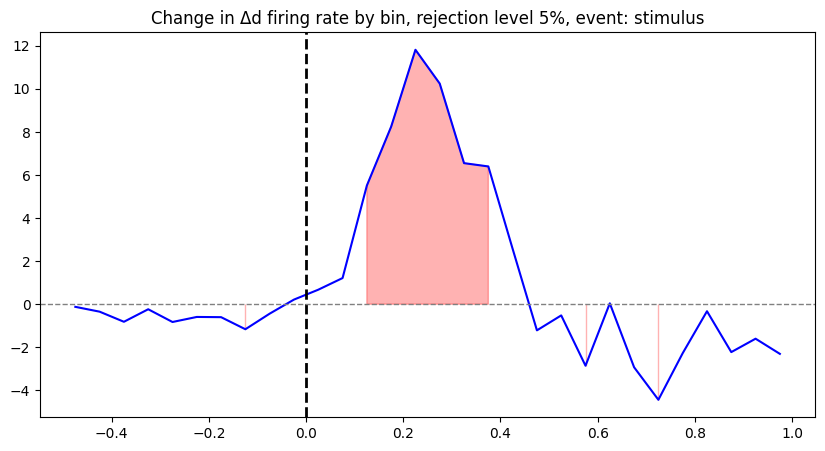

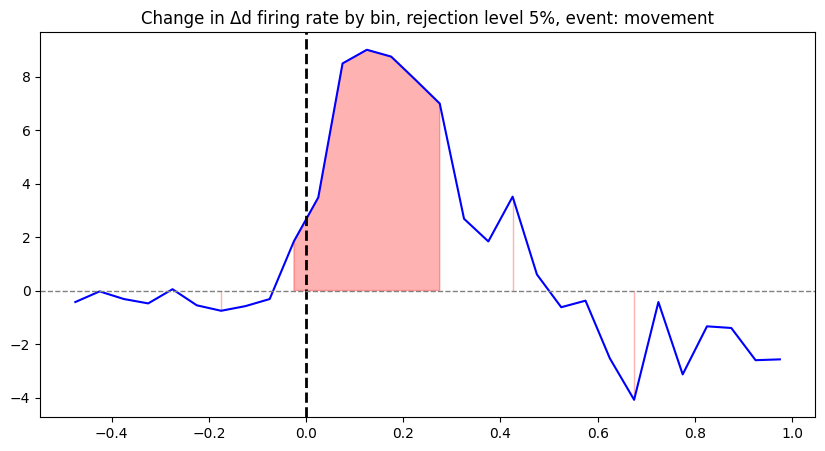

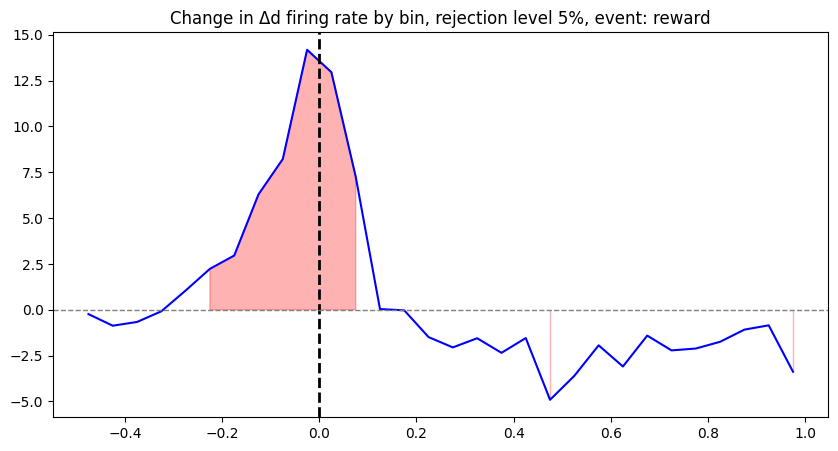

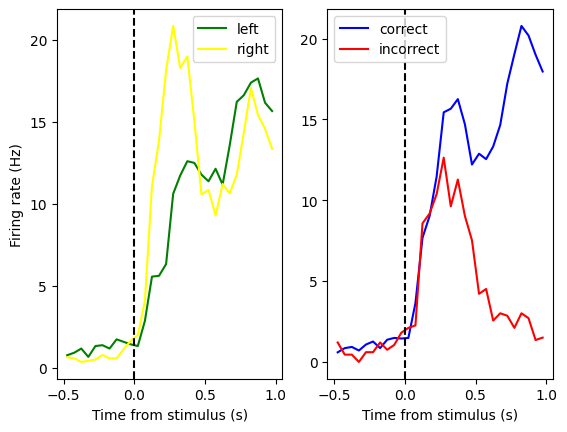

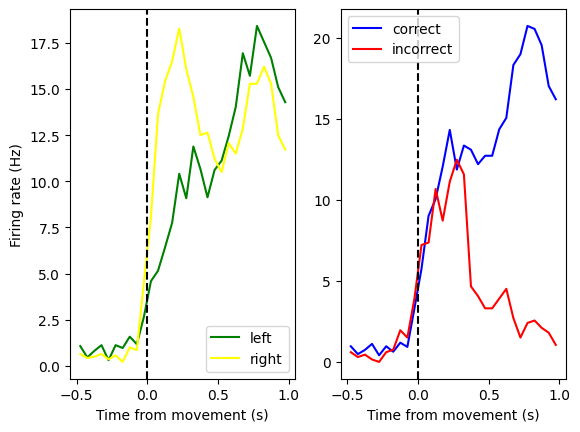

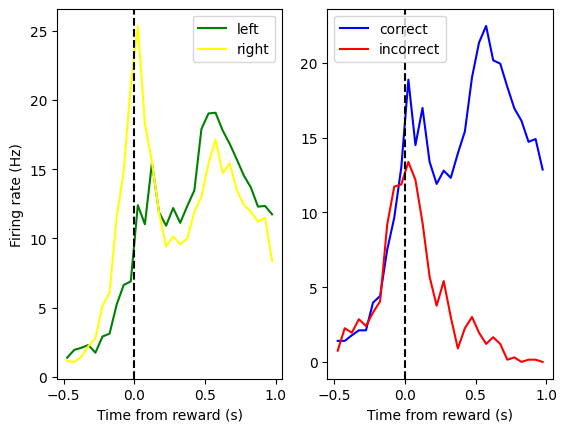

cluster #69


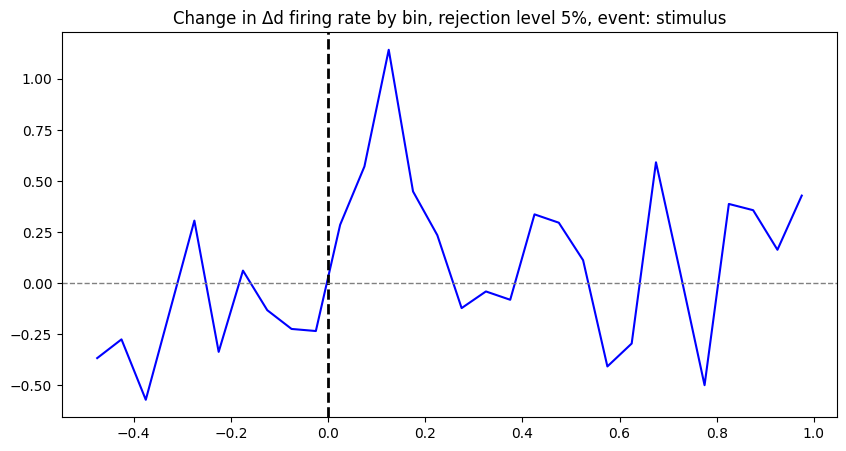

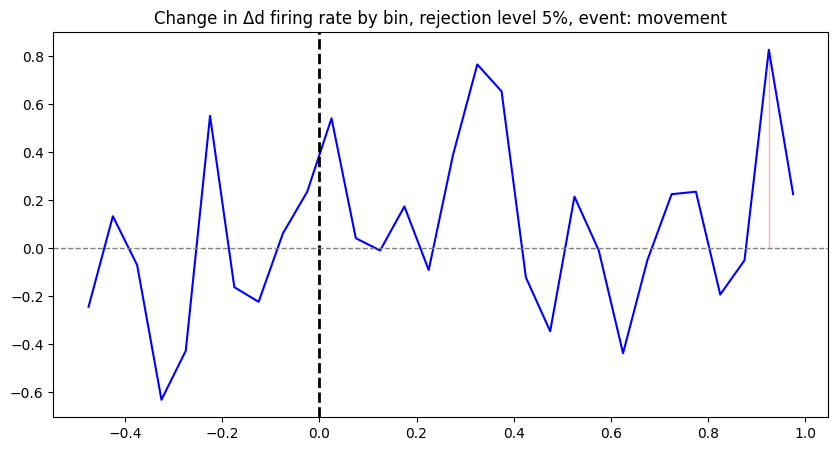

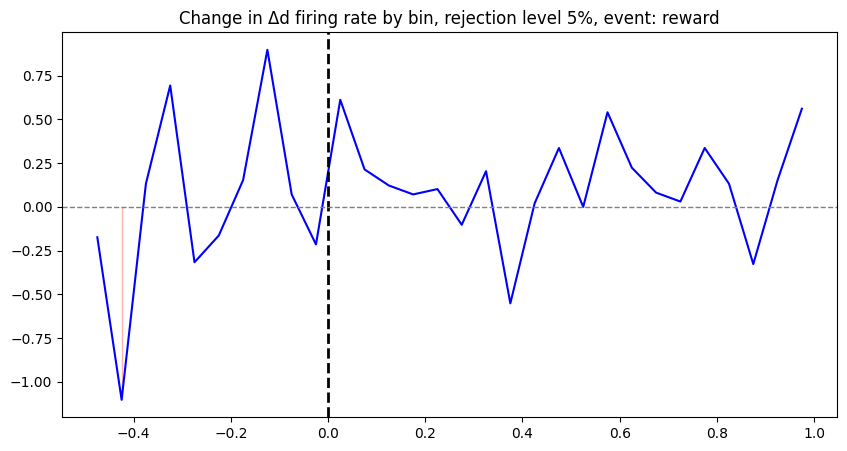

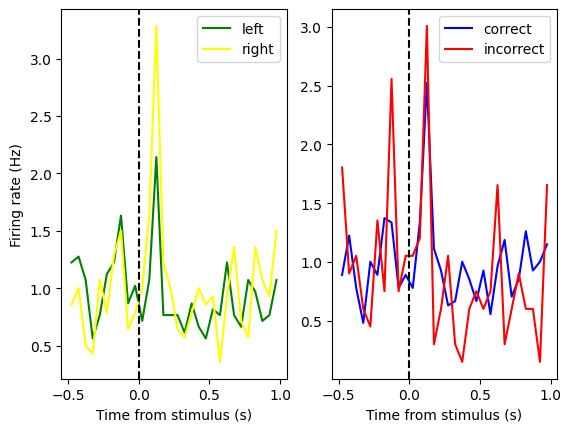

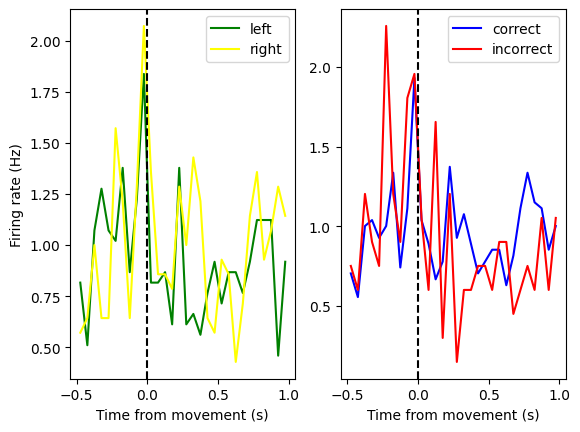

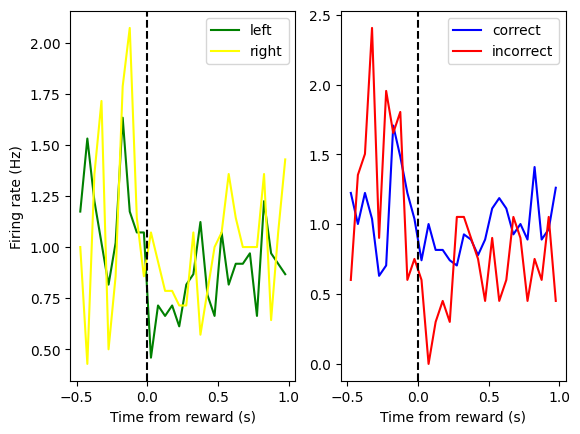

cluster #147


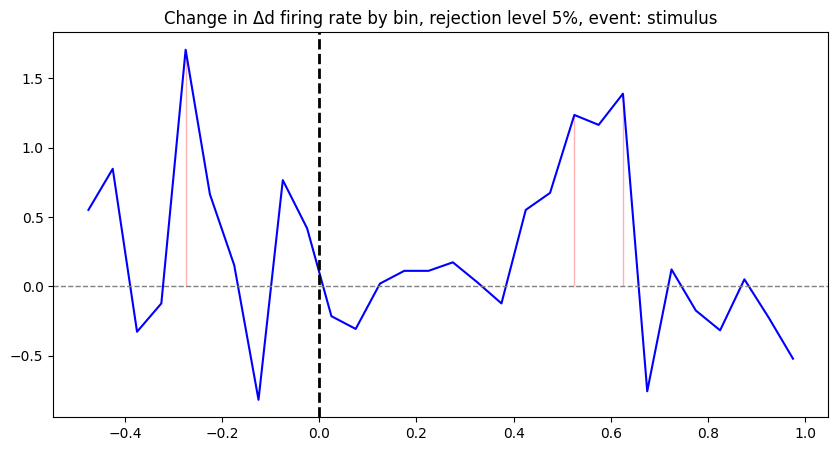

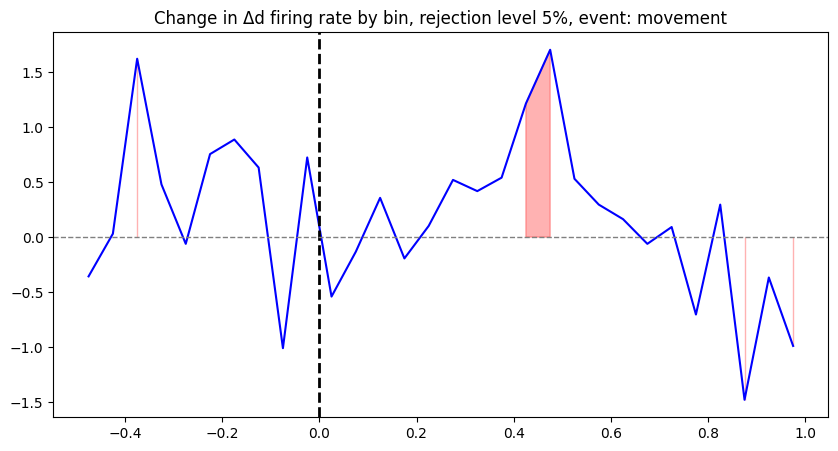

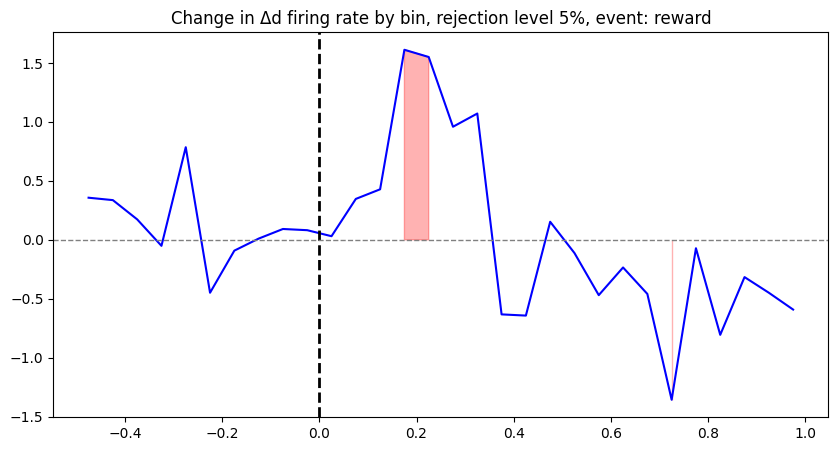

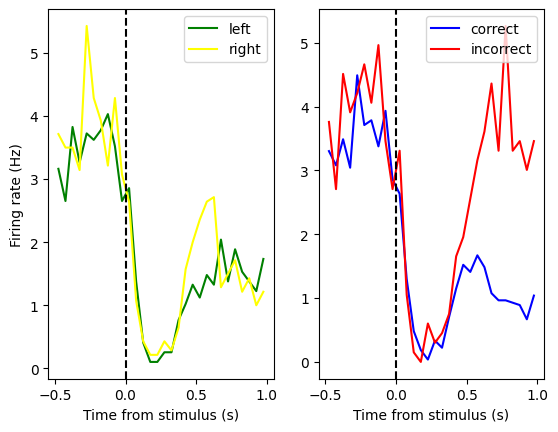

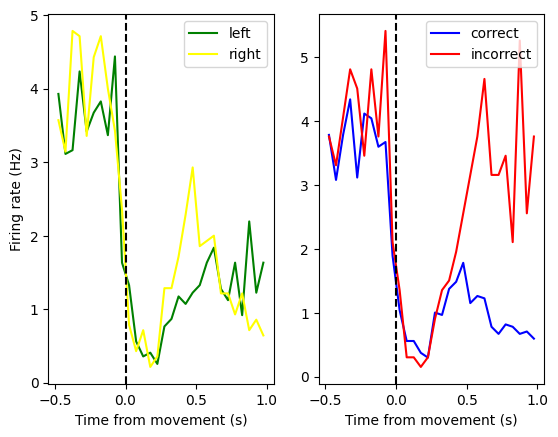

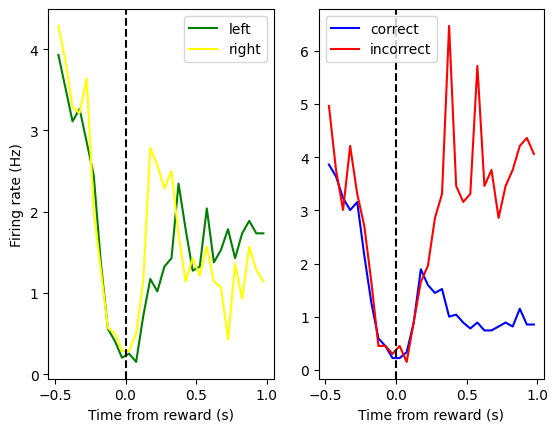

cluster #163


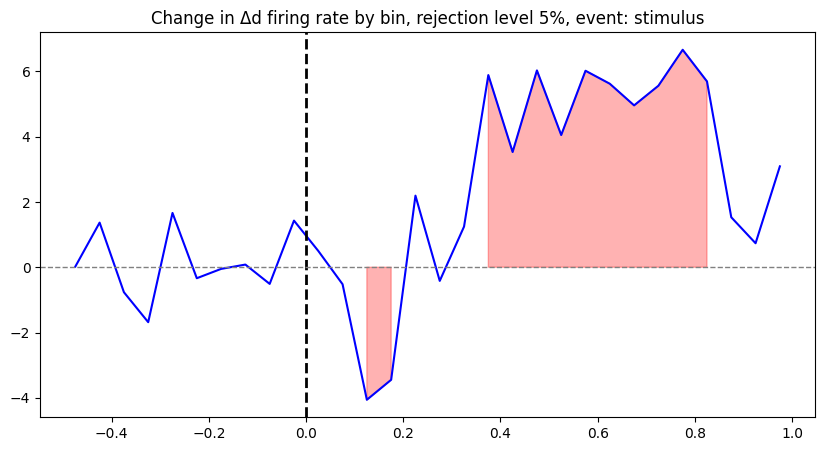

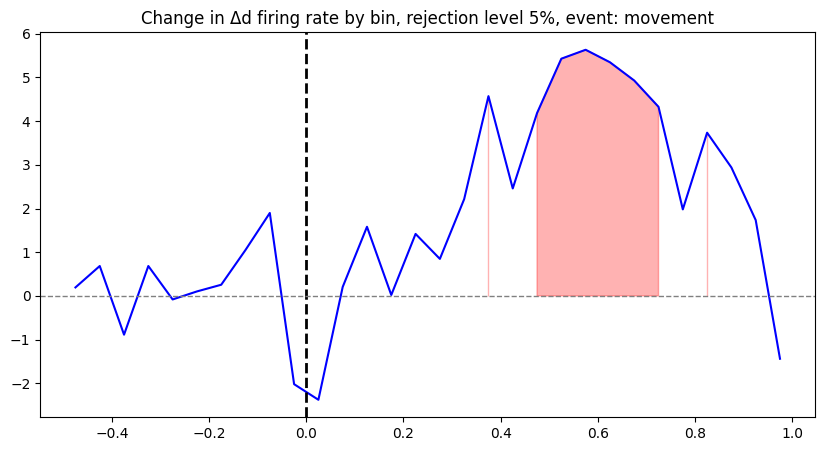

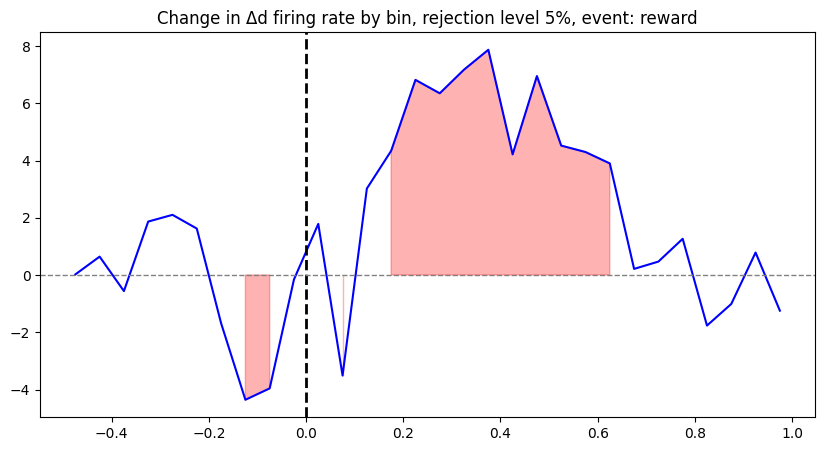

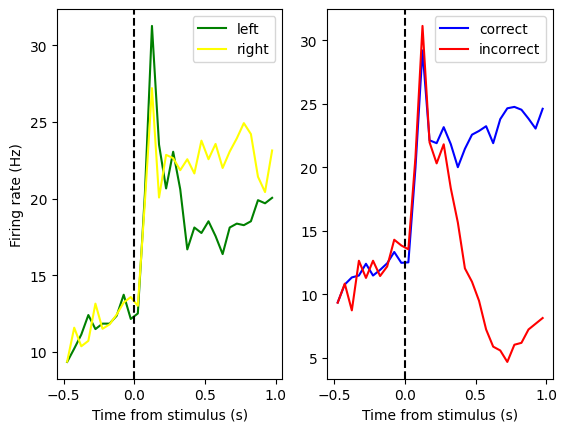

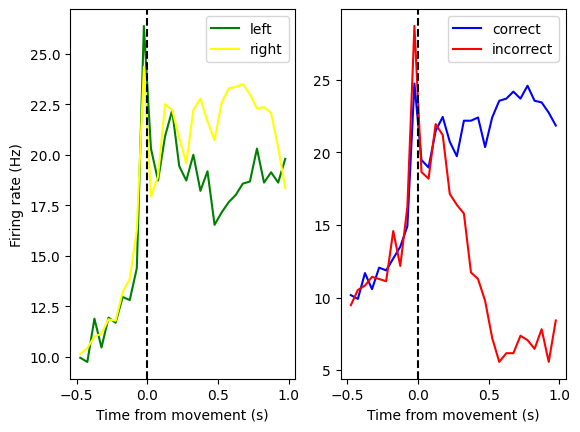

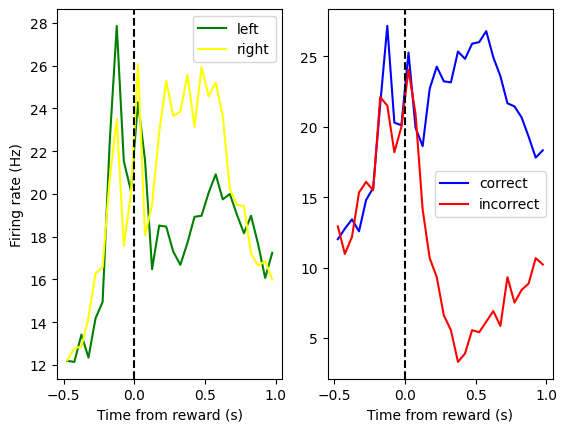

cluster #172


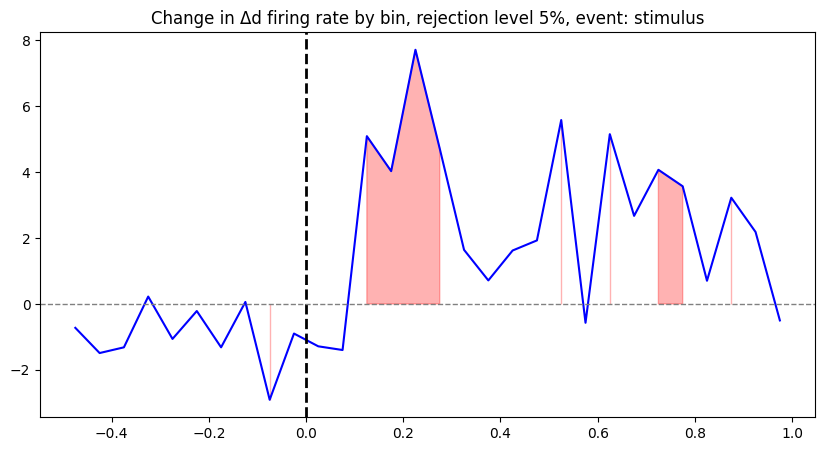

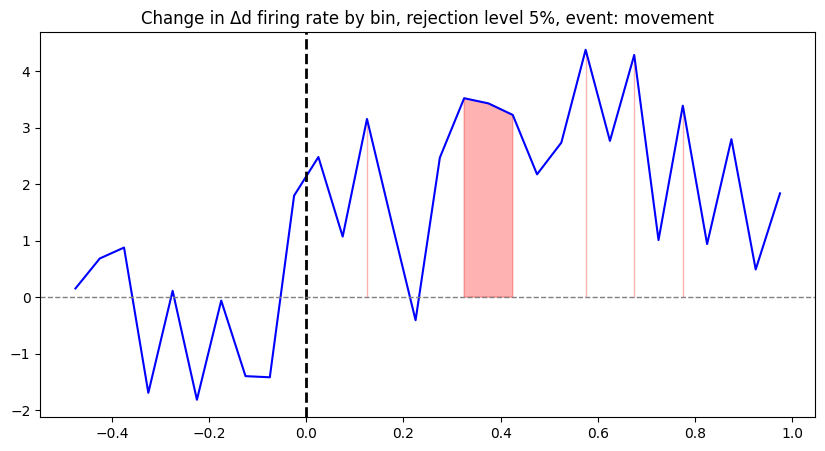

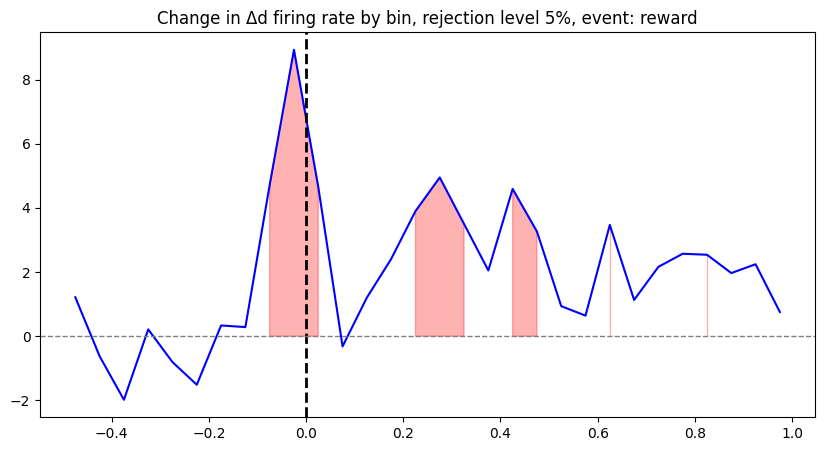

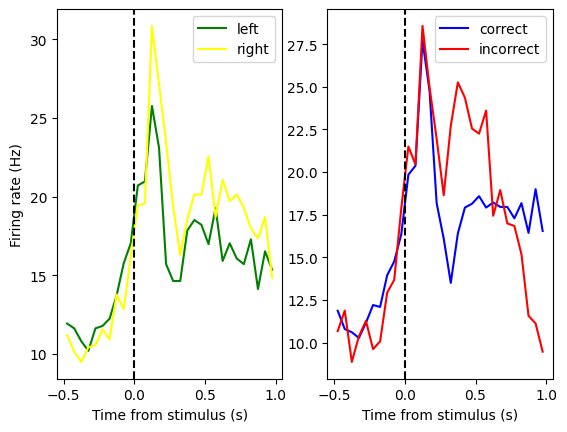

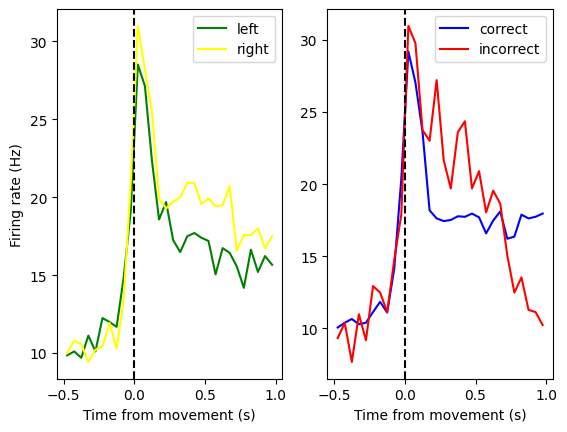

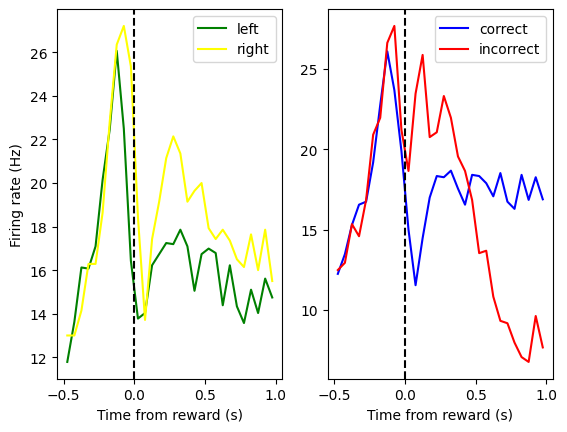

cluster #177


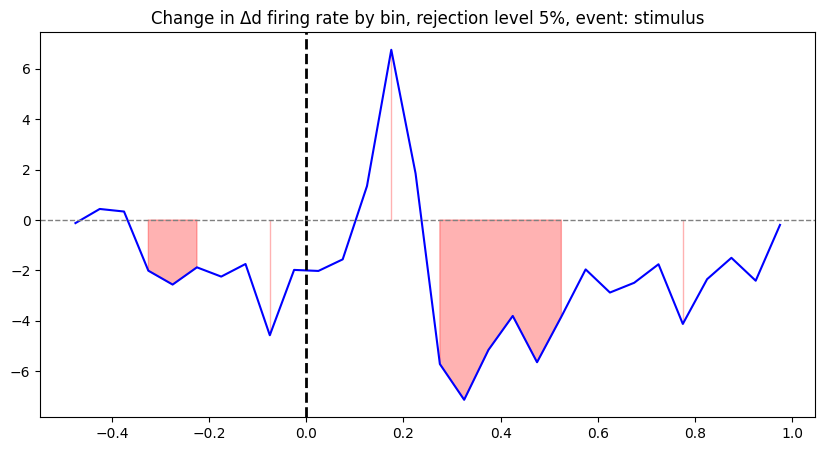

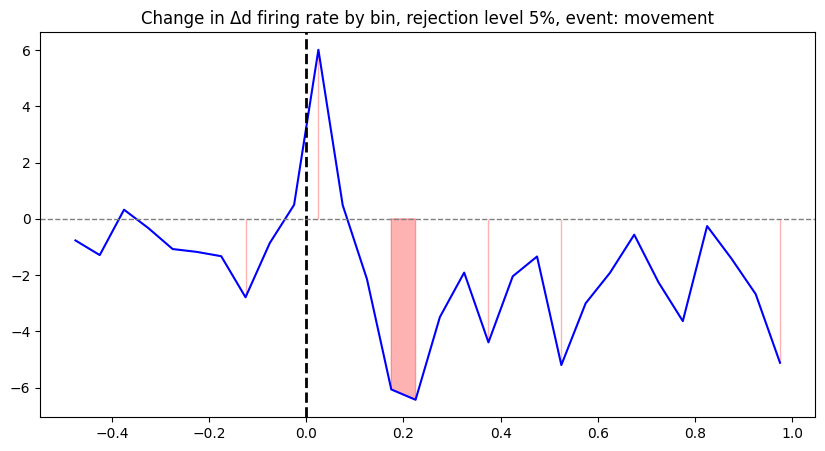

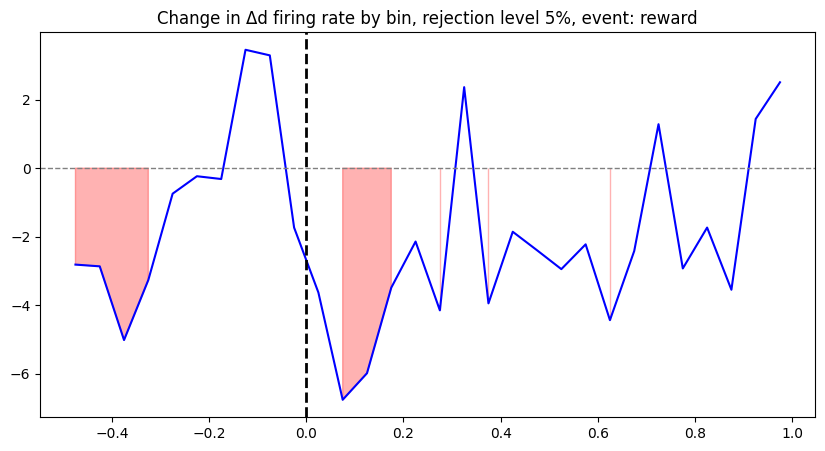

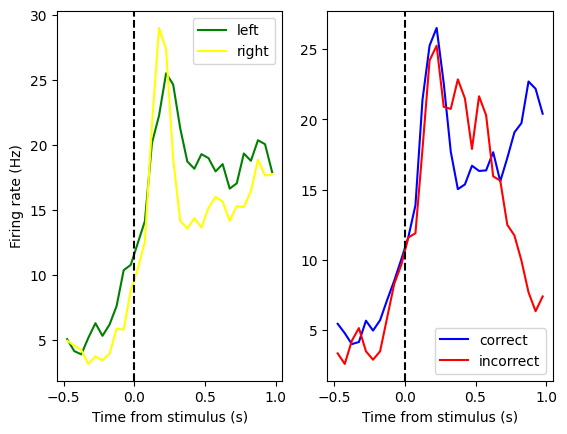

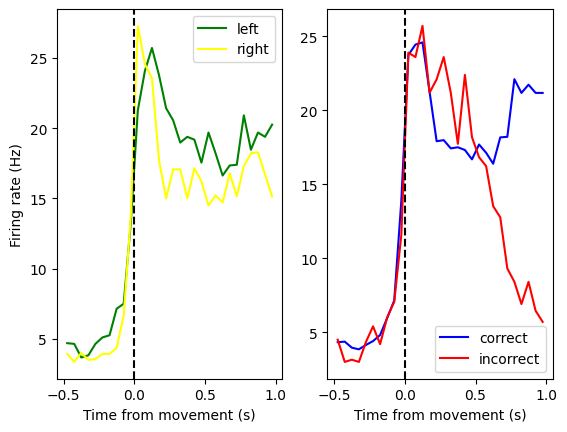

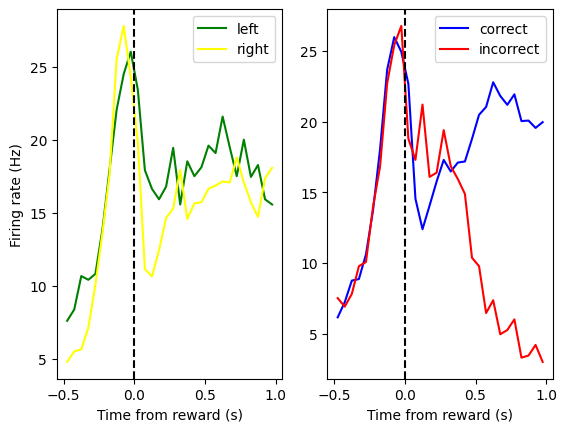

cluster #178


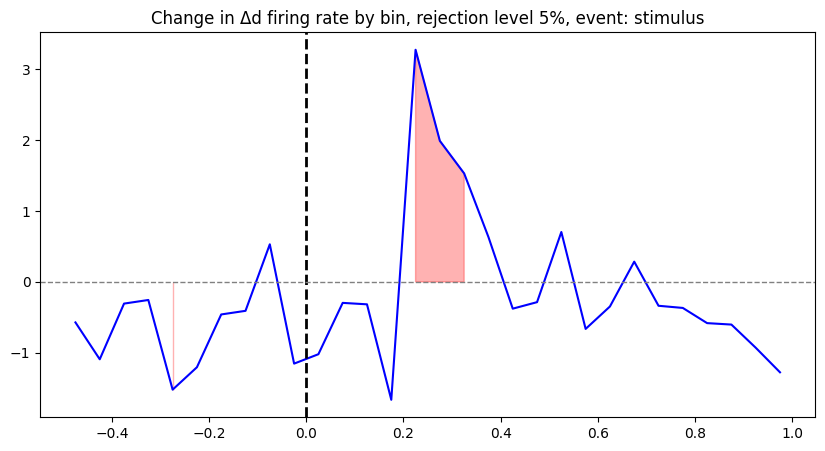

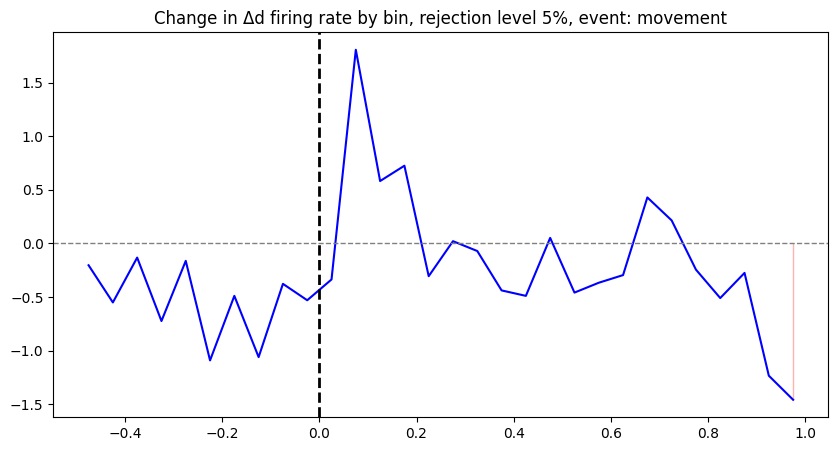

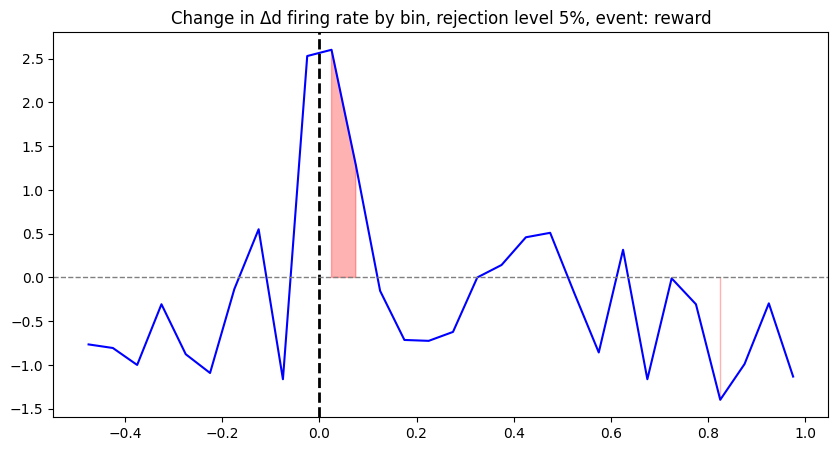

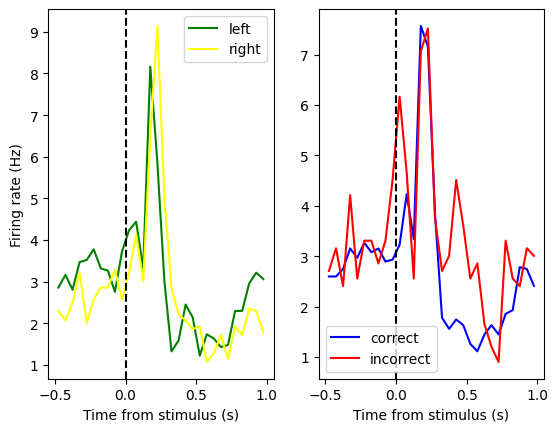

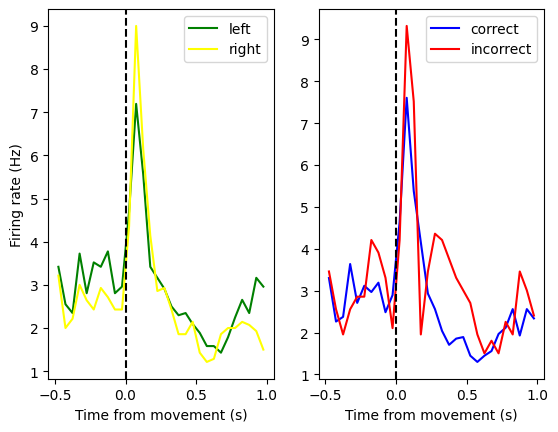

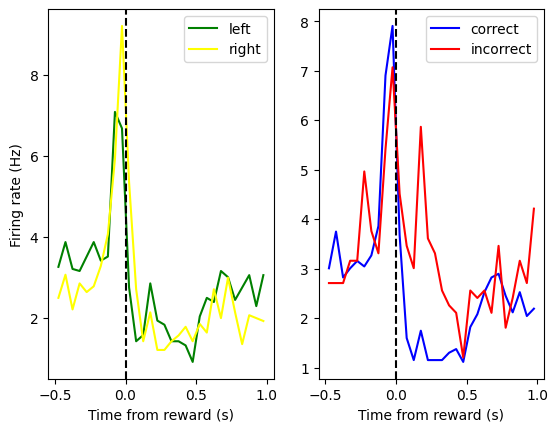

cluster #196


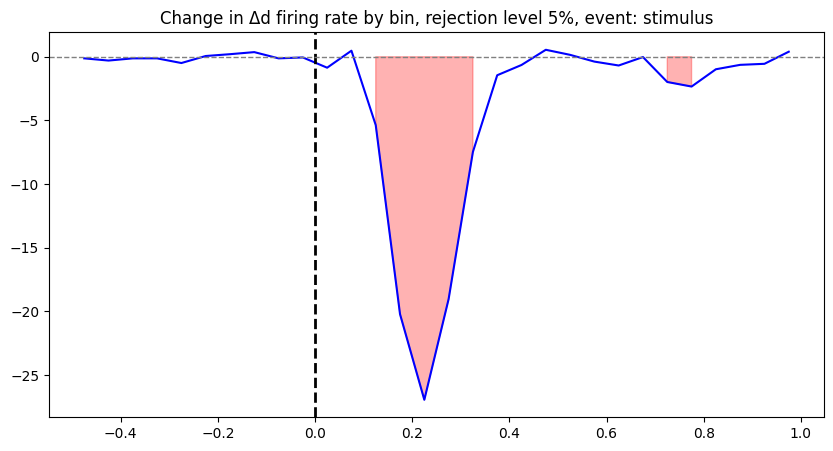

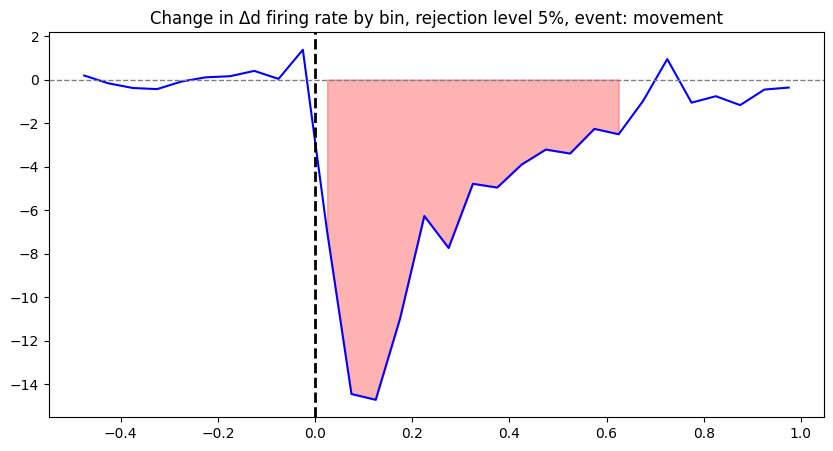

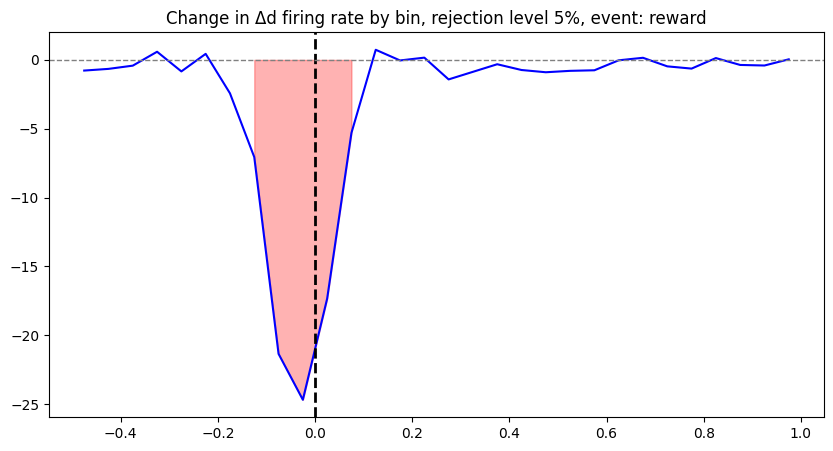

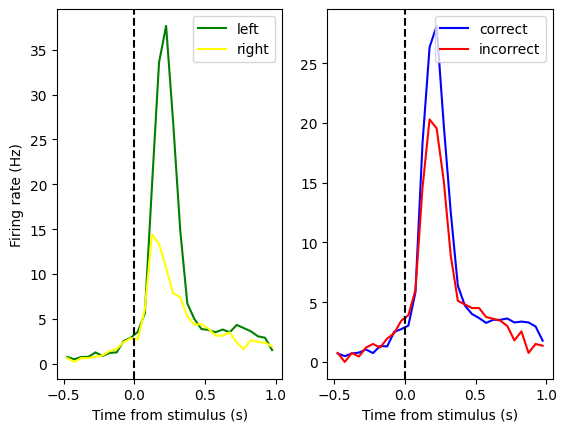

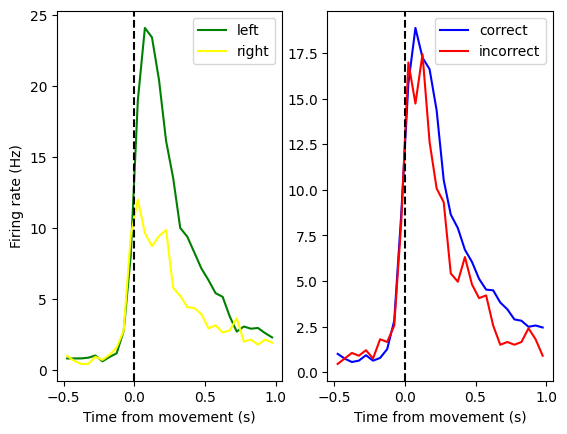

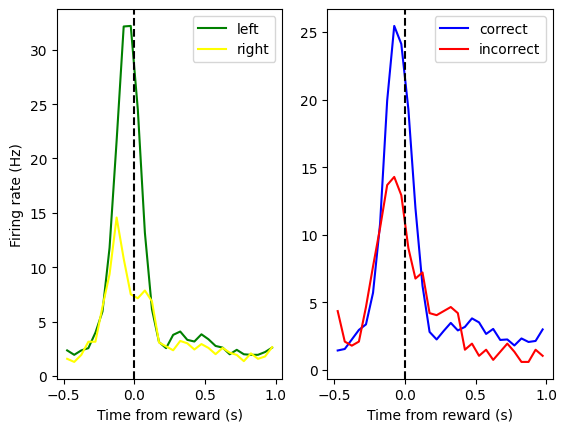

cluster #206


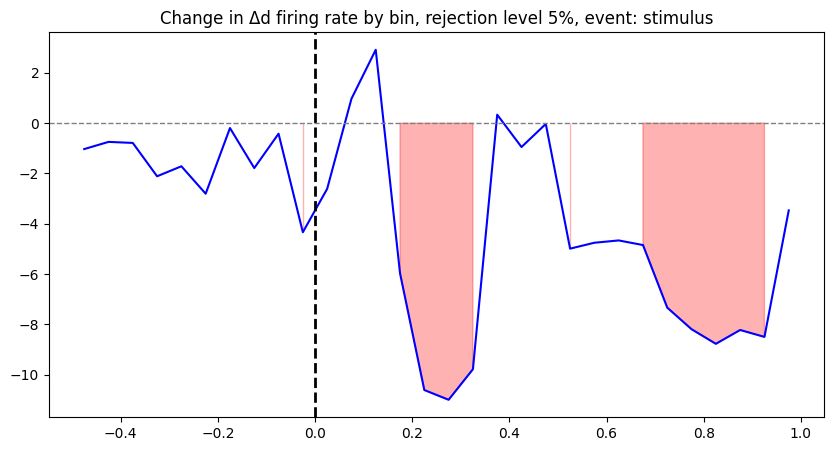

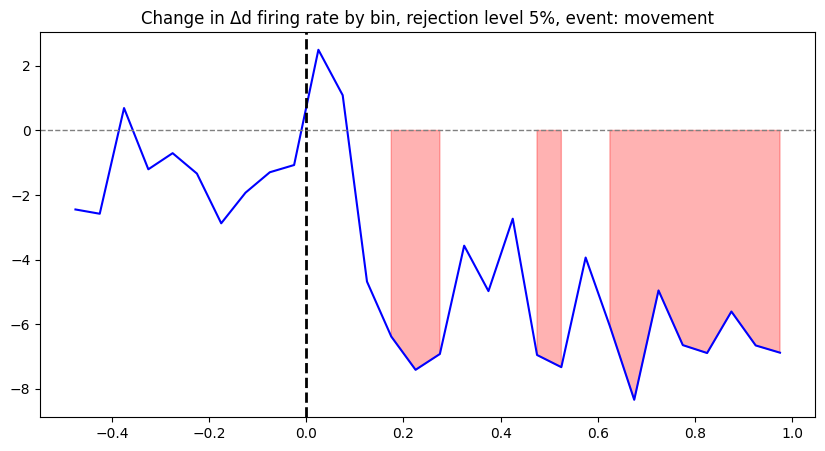

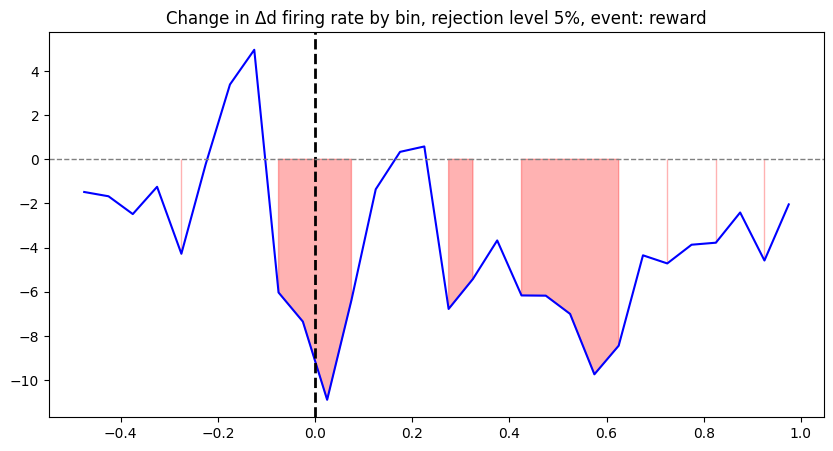

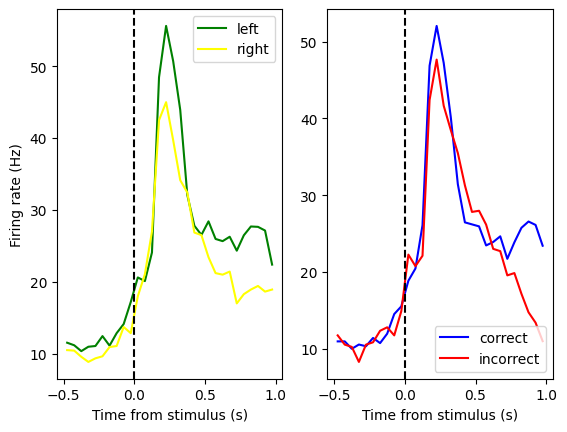

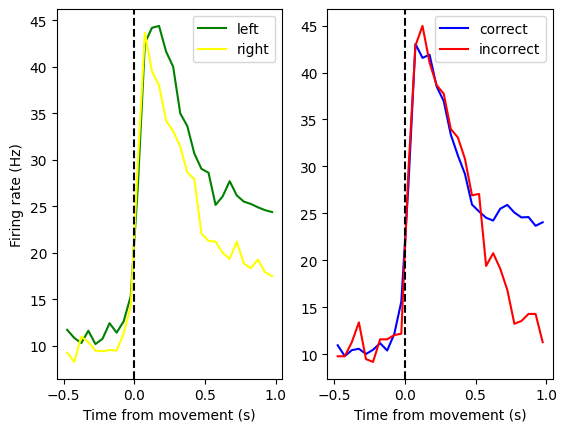

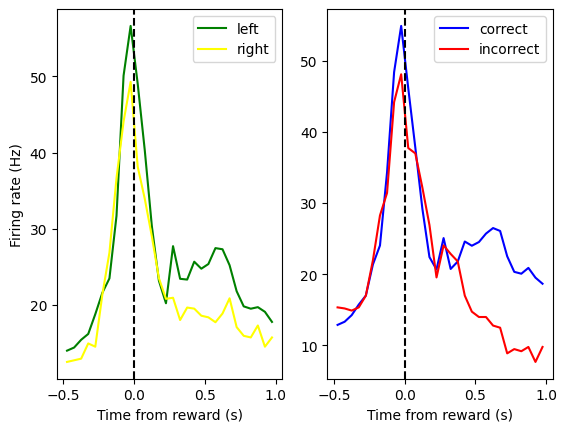

cluster #257


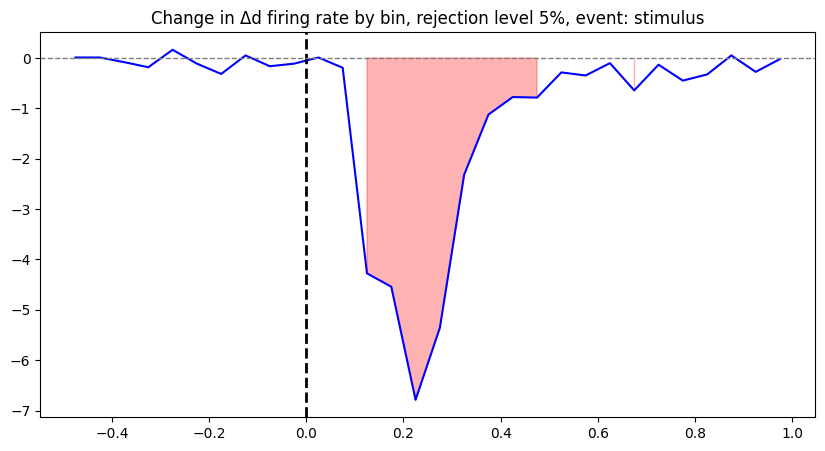

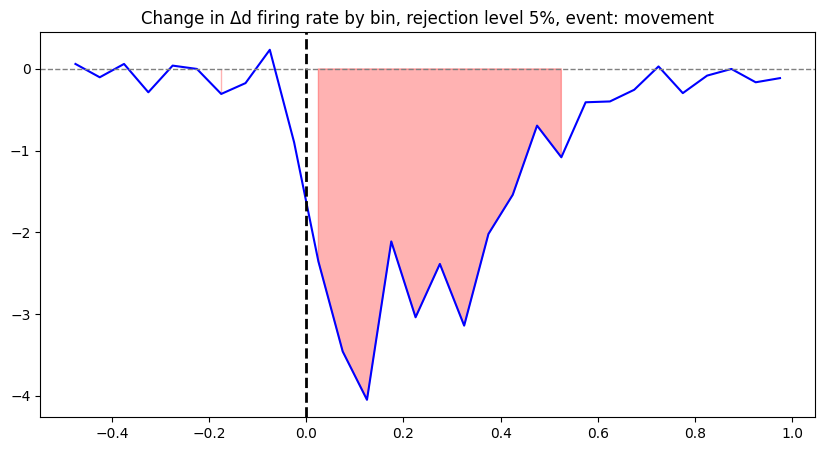

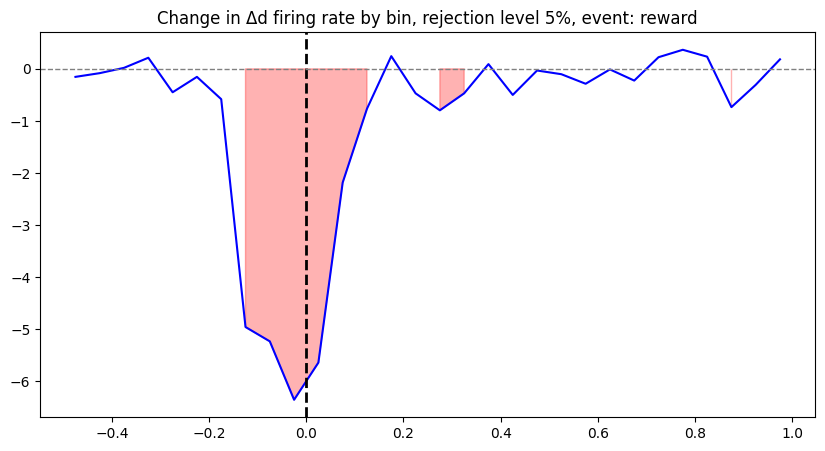

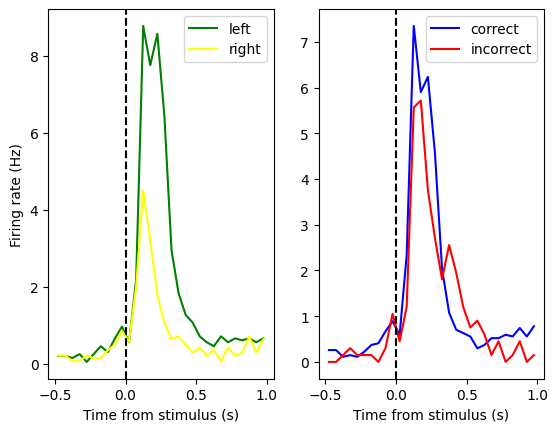

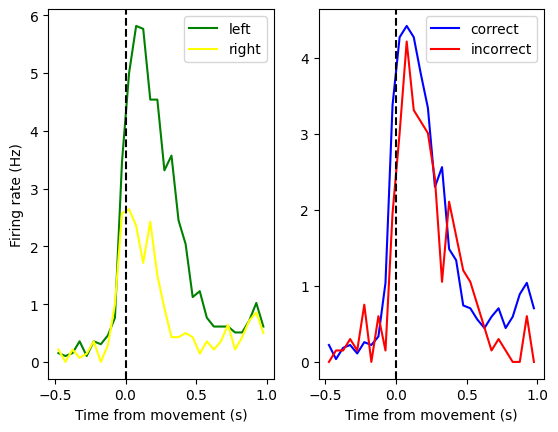

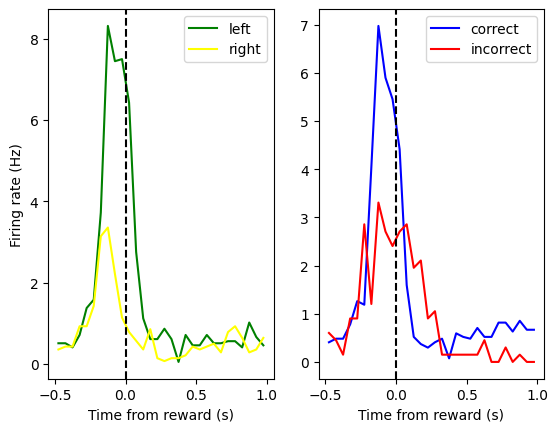

In [26]:
significant_stim_clusters = []
significant_movement_clusters = []
significant_reward_clusters = []
for cluster in cluster_ids:
    spikes_idx = (spikes['clusters'] == cluster)
    spike_times = spikes.times[spikes_idx]
    
    stim_spike_raster, stim_times = bin_spikes(spike_times, stimulus_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    stim_spike_raster = stim_spike_raster / bin_size

    move_spike_raster, move_times = bin_spikes(spike_times, movement_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    move_spike_raster = move_spike_raster / bin_size

    reward_spike_raster, reward_times = bin_spikes(spike_times, reward_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    reward_spike_raster = reward_spike_raster / bin_size

    print(f"cluster #{cluster}")
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on stimulus 
    left_idx = ~np.isnan(sl.trials['contrastLeft'])
    right_idx = ~np.isnan(sl.trials['contrastRight'])
    psth_left = np.nanmean(stim_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(stim_spike_raster[right_idx], axis=0)
    
    correct_idx = sl.trials['feedbackType'] == 1
    incorrect_idx = sl.trials['feedbackType'] == -1
    psth_correct = np.nanmean(stim_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(stim_spike_raster[incorrect_idx], axis=0)

#------permutation testing for stimOn event--------------------------------------------------------------------------------------------------------------
    n_shuffles = 1000  # Number of permutations
    
    # Initialize matrices for delta and shuffled deltas
    stim_d = np.zeros((stim_spike_raster.shape[1]))  # Observed delta
    stim_shuffled_d = np.zeros((n_shuffles, stim_spike_raster.shape[1]))  # Null distribution
    
    # Compute observed delta (difference in mean firing rates per bin)
    for i in range(stim_spike_raster.shape[1]):  # Loop over time bins
        stim_d[i] = np.nanmean(stim_spike_raster[right_idx, i]) - np.nanmean(stim_spike_raster[left_idx, i])

    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx) 
        shuffled_right = np.random.permutation(right_idx)# Shuffle trial labels
        for i in range(stim_spike_raster.shape[1]):
            stim_shuffled_d[shuff, i] = np.nanmean(stim_spike_raster[shuffled_right, i]) - np.nanmean(stim_spike_raster[shuffled_left, i])
    stim_p_values = np.mean(np.abs(stim_shuffled_d) >= np.abs(stim_d), axis=0)

    alpha = 0.01  # Desired false discovery rate
    stim_reject, stim_p_fdr_corrected, _, _ = multipletests(stim_p_values, alpha=alpha, method='fdr_bh')
    
    significant_stim_times = np.where(stim_reject)[0]  # Time bins with significant differences
    if (np.count_nonzero(stim_reject) > 3):
        significant_stim_clusters.append(cluster)
    
    # Find the index where the event occurs (should be time zero in aligned bins)
    event_time_idx = np.argmin(np.abs(stim_times))  # Find closest bin to time zero
    
    plt.figure(figsize=(10, 5))
    plt.plot(stim_times, stim_d, label="Observed Δ Firing Rate", color='blue')  # X-axis should be real time
    plt.title("Change in Δd firing rate by bin, rejection level 5%, event: stimulus")
    # Draw a vertical line at event onset (aligned to zero time)
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    
    # Draw horizontal baseline
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  
    
    # Highlight significant time bins only
    plt.fill_between(stim_times, stim_d, where=stim_reject, color='red', alpha=0.3, label="Significant (FDR < 0.05)")


 ##-------permutation testing for firstMove event------------------------------------------------------------------------------------------------------
    
    # Initialize matrices for delta and shuffled deltas
    movement_d = np.zeros((move_spike_raster.shape[1]))  # Observed delta
    shuffled_movement_d = np.zeros((n_shuffles, move_spike_raster.shape[1]))  # Null distribution
    
    # Compute observed delta (difference in mean firing rates per bin)
    for i in range(move_spike_raster.shape[1]):  # Loop over time bins
        movement_d[i] = np.nanmean(move_spike_raster[right_idx, i]) - np.nanmean(move_spike_raster[left_idx, i])

    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx) 
        shuffled_right = np.random.permutation(right_idx)# Shuffle trial labels
        for i in range(stim_spike_raster.shape[1]):
            shuffled_movement_d[shuff, i] = np.nanmean(move_spike_raster[shuffled_right, i]) - np.nanmean(move_spike_raster[shuffled_left, i])
    movement_p_values = np.mean(np.abs(shuffled_movement_d) >= np.abs(movement_d), axis=0)

    alpha = 0.01  # Desired false discovery rate
    movement_reject, movement_p_fdr_corrected, _, _ = multipletests(movement_p_values, alpha=alpha, method='fdr_bh')
    
    significant_movement_times = np.where(movement_reject)[0]  # Time bins with significant differences
    if np.count_nonzero(movement_reject) > 3:
        significant_movement_clusters.append(cluster)
        
    # Find the index where the event occurs (should be time zero in aligned bins)
    event_time_idx = np.argmin(np.abs(move_times))  # Find closest bin to time zero
    
    plt.figure(figsize=(10, 5))
    plt.plot(move_times, movement_d, label="Observed Δ Firing Rate", color='blue')  # X-axis should be real time
    plt.title("Change in Δd firing rate by bin, rejection level 5%, event: movement")
    # Draw a vertical line at event onset (aligned to zero time)
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    
    # Draw horizontal baseline
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  
    
    # Highlight significant time bins only
    plt.fill_between(move_times, movement_d, where=movement_reject, color='red', alpha=0.3, label="Significant (FDR < 0.05)")
    
##-----------permutation testing for reward event------------------------------------------------------------------------------------------------------
    
    # Initialize matrices for delta and shuffled deltas
    reward_d = np.zeros((reward_spike_raster.shape[1]))  # Observed delta
    shuffled_reward_d = np.zeros((n_shuffles, reward_spike_raster.shape[1]))  # Null distribution
    
    # Compute observed delta (difference in mean firing rates per bin)
    for i in range(reward_spike_raster.shape[1]):  # Loop over time bins
        reward_d[i] = np.nanmean(reward_spike_raster[right_idx, i]) - np.nanmean(reward_spike_raster[left_idx, i])

    for shuff in range(n_shuffles):
        shuffled_left = np.random.permutation(left_idx) 
        shuffled_right = np.random.permutation(right_idx)# Shuffle trial labels
        for i in range(reward_spike_raster.shape[1]):
            shuffled_reward_d[shuff, i] = np.nanmean(reward_spike_raster[shuffled_right, i]) - np.nanmean(reward_spike_raster[shuffled_left, i])
    reward_p_values = np.mean(np.abs(shuffled_reward_d) >= np.abs(reward_d), axis=0)

    alpha = 0.01  # Desired false discovery rate
    reward_reject, reward_p_fdr_corrected, _, _ = multipletests(reward_p_values, alpha=alpha, method='fdr_bh')
    
    significant_reward_times = np.where(reward_reject)[0]  # Time bins with significant differences
    if np.count_nonzero(reward_reject) > 3:
        significant_reward_clusters.append(cluster)
    # Find the index where the event occurs (should be time zero in aligned bins)
    event_time_idx = np.argmin(np.abs(reward_times))  # Find closest bin to time zero
    
    plt.figure(figsize=(10, 5))
    plt.plot(reward_times, reward_d, label="Observed Δ Firing Rate", color='blue')  # X-axis should be real time
    plt.title("Change in Δd firing rate by bin, rejection level 5%, event: reward")
    # Draw a vertical line at event onset (aligned to zero time)
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label="Event Onset")
    
    # Draw horizontal baseline
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  
    
    # Highlight significant time bins only
    plt.fill_between(reward_times, reward_d, where=reward_reject, color='red', alpha=0.3, label="Significant (FDR < 0.05)")
 ##-----sub-graphs----------------------------------------------------------------------------------------------------------------------------------------   
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(stim_times, psth_left, c='green')
    axs[0].plot(stim_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from stimulus (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(stim_times, psth_correct, c='blue')
    axs[1].plot(stim_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from stimulus (s)')

    plt.show()
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on movement
    psth_left = np.nanmean(move_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(move_spike_raster[right_idx], axis=0)
    psth_correct = np.nanmean(move_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(move_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(move_times, psth_left, c='green')
    axs[0].plot(move_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from movement (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(move_times, psth_correct, c='blue')
    axs[1].plot(move_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from movement (s)')

    plt.show()
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on reward
    psth_left = np.nanmean(reward_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(reward_spike_raster[right_idx], axis=0)
    psth_correct = np.nanmean(reward_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(reward_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(reward_times, psth_left, c='green')
    axs[0].plot(reward_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from reward (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(reward_times, psth_correct, c='blue')
    axs[1].plot(reward_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from reward (s)')

    plt.show()

In [28]:
significant_stim_clusters, significant_movement_clusters, significant_reward_clusters

([np.int64(11),
  np.int64(163),
  np.int64(172),
  np.int64(177),
  np.int64(178),
  np.int64(196),
  np.int64(206),
  np.int64(257)],
 [np.int64(11),
  np.int64(147),
  np.int64(163),
  np.int64(172),
  np.int64(177),
  np.int64(196),
  np.int64(206),
  np.int64(257)],
 [np.int64(11),
  np.int64(163),
  np.int64(172),
  np.int64(177),
  np.int64(196),
  np.int64(206),
  np.int64(257)])